In [2]:
#libraries
# TensorFlow, google machine learning library
import tensorflow as tf
# Neural networks library
from tensorflow import keras
# database management library
import pandas as pd
# linear algebra library
import numpy as np
# plot library
import matplotlib.pyplot as plt
# scientific math library
import scipy.io
# machine learning library
import sklearn as skl
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
# pseudo-random numbers library
import random
# library for correlation map
import seaborn as sns
from sklearn.svm import SVR 

#

In [2]:
data = pd.read_csv('inverter Data Set.csv')

In [3]:
data.head()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,-1.792057,-0.716639,2.729208,-2.098439,...,-0.613965,0.667181,0.874633,0.125367,0.706206,0.862754,0.137246,360.541201,510.640963,82.471117
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,-1.556948,-0.757338,2.461991,-1.792057,...,-0.758263,0.642184,0.880046,0.119954,0.667181,0.874633,0.125367,346.410081,513.190083,79.729357
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,-1.332946,-0.840587,2.292110,-1.556948,...,-0.698139,0.611911,0.884307,0.115693,0.642184,0.880046,0.119954,329.440240,515.804643,77.924637
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,-1.135788,-0.925686,2.155288,-1.332946,...,-0.716639,0.578149,0.888915,0.111085,0.611911,0.884307,0.115693,311.058880,517.537603,75.478717
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,-0.918266,-1.027434,2.048768,-1.135788,...,-0.757338,0.541979,0.892123,0.107877,0.578149,0.888915,0.111085,290.481760,519.138403,73.580077


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234527 entries, 0 to 234526
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   n_k       234527 non-null  float64
 1   u_dc_k    234527 non-null  float64
 2   u_dc_k-1  234527 non-null  float64
 3   u_dc_k-2  234527 non-null  float64
 4   u_dc_k-3  234527 non-null  float64
 5   i_a_k     234527 non-null  float64
 6   i_b_k     234527 non-null  float64
 7   i_c_k     234527 non-null  float64
 8   i_a_k-1   234527 non-null  float64
 9   i_b_k-1   234527 non-null  float64
 10  i_c_k-1   234527 non-null  float64
 11  i_a_k-2   234527 non-null  float64
 12  i_b_k-2   234527 non-null  float64
 13  i_c_k-2   234527 non-null  float64
 14  i_a_k-3   234527 non-null  float64
 15  i_b_k-3   234527 non-null  float64
 16  i_c_k-3   234527 non-null  float64
 17  d_a_k-2   234527 non-null  float64
 18  d_b_k-2   234527 non-null  float64
 19  d_c_k-2   234527 non-null  float64
 20  d_a_

array([[<Axes: title={'center': 'n_k'}>,
        <Axes: title={'center': 'u_dc_k'}>,
        <Axes: title={'center': 'u_dc_k-1'}>,
        <Axes: title={'center': 'u_dc_k-2'}>,
        <Axes: title={'center': 'u_dc_k-3'}>],
       [<Axes: title={'center': 'i_a_k'}>,
        <Axes: title={'center': 'i_b_k'}>,
        <Axes: title={'center': 'i_c_k'}>,
        <Axes: title={'center': 'i_a_k-1'}>,
        <Axes: title={'center': 'i_b_k-1'}>],
       [<Axes: title={'center': 'i_c_k-1'}>,
        <Axes: title={'center': 'i_a_k-2'}>,
        <Axes: title={'center': 'i_b_k-2'}>,
        <Axes: title={'center': 'i_c_k-2'}>,
        <Axes: title={'center': 'i_a_k-3'}>],
       [<Axes: title={'center': 'i_b_k-3'}>,
        <Axes: title={'center': 'i_c_k-3'}>,
        <Axes: title={'center': 'd_a_k-2'}>,
        <Axes: title={'center': 'd_b_k-2'}>,
        <Axes: title={'center': 'd_c_k-2'}>],
       [<Axes: title={'center': 'd_a_k-3'}>,
        <Axes: title={'center': 'd_b_k-3'}>,
        <Axes:

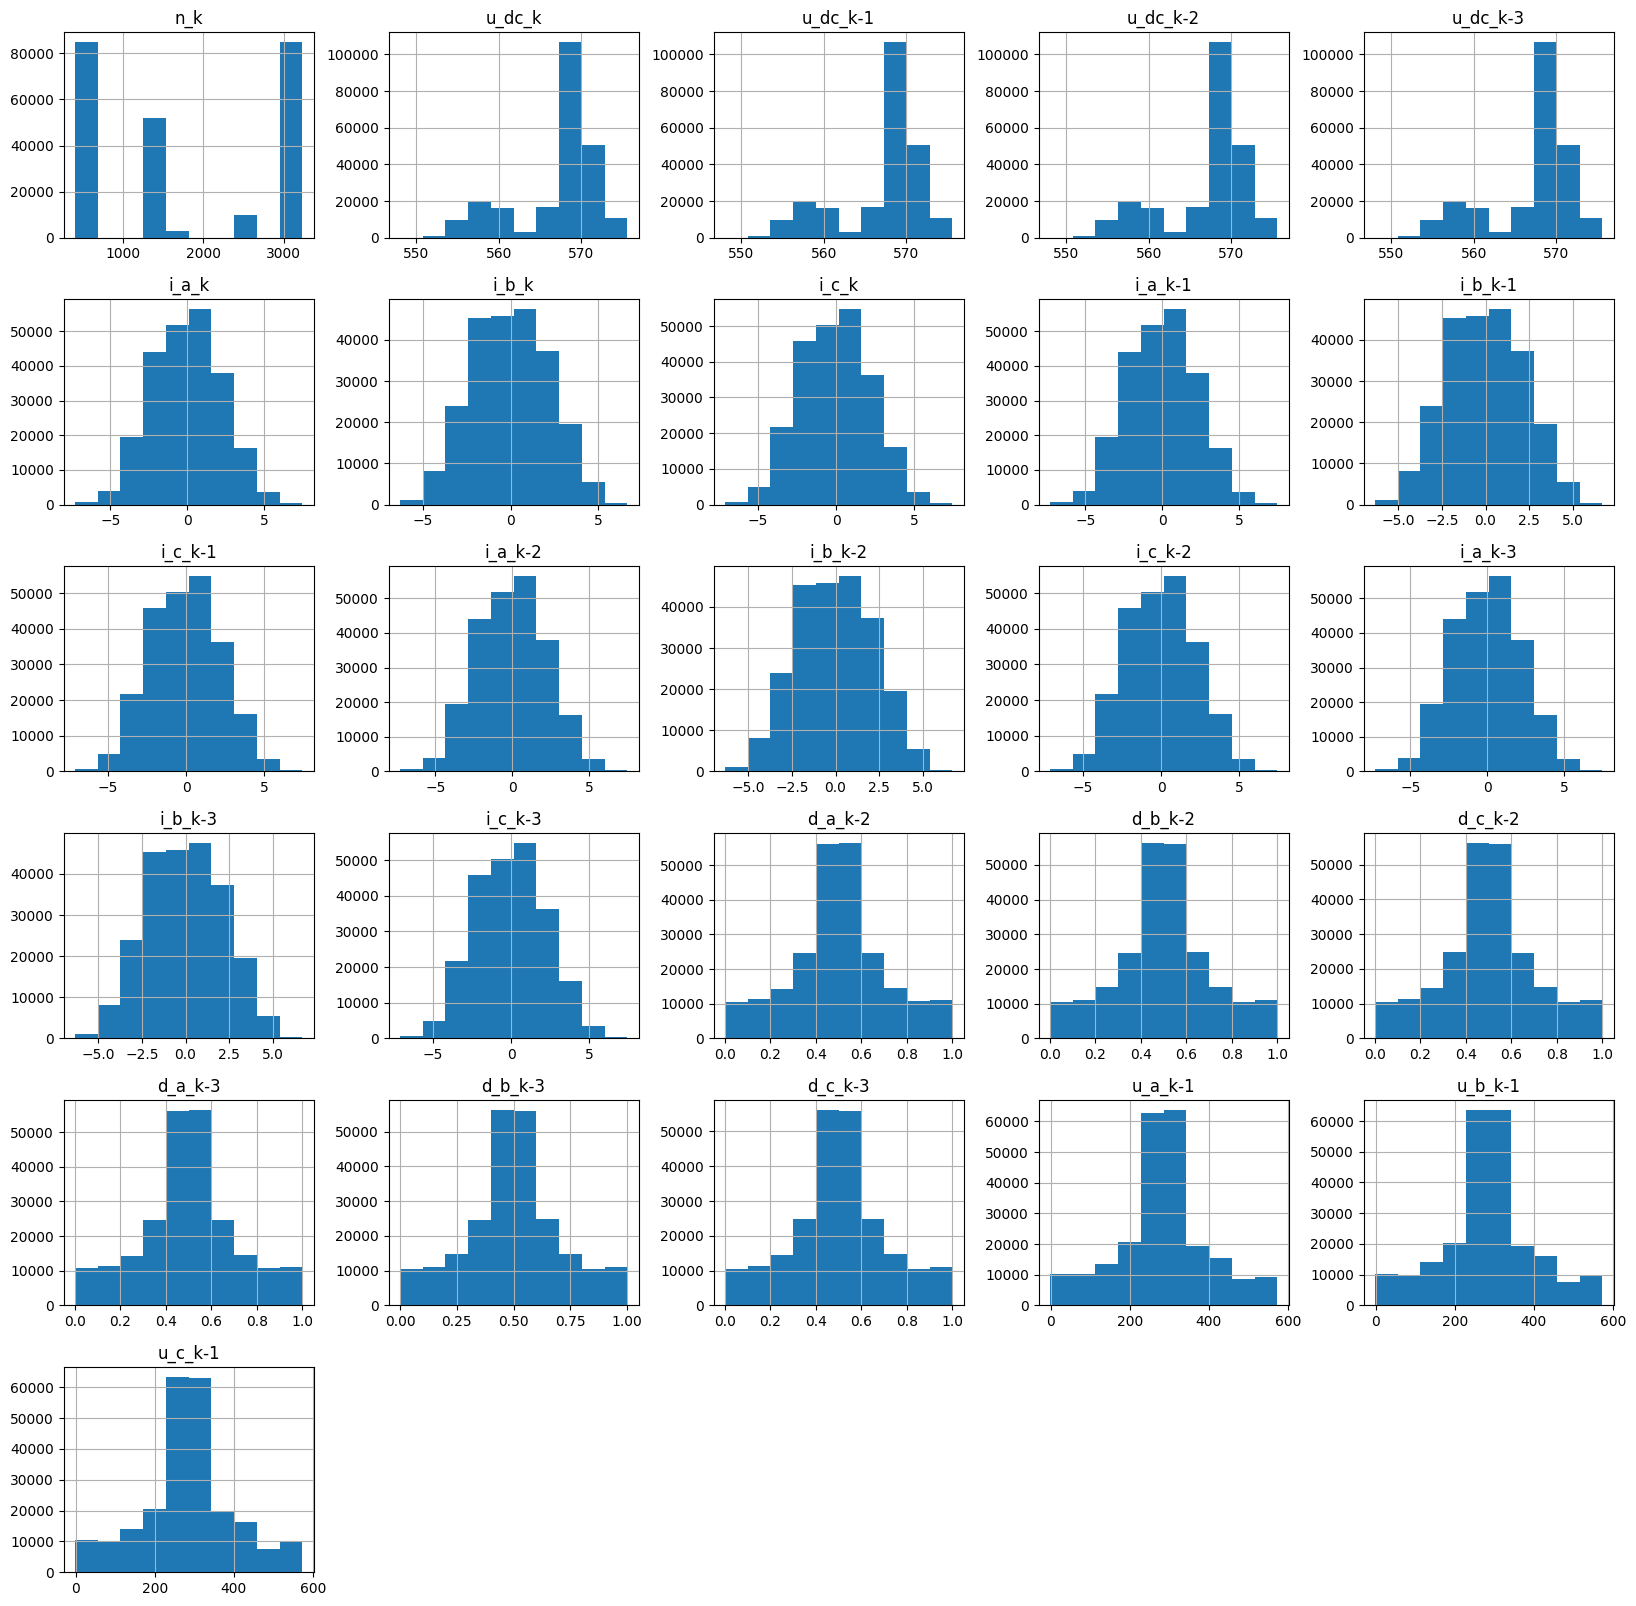

In [4]:
data.hist(figsize=(20,20))

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
n_k,234527.0,1728.414990,1084.463934,404.433935,507.572918,1501.516456,2996.851500,3231.756077
u_dc_k,234527.0,567.136398,4.993615,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-1,234527.0,567.136565,4.993462,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-2,234527.0,567.136718,4.993317,548.012908,566.730100,568.649812,570.126514,575.553392
u_dc_k-3,234527.0,567.136882,4.993180,548.012908,566.730100,568.649812,570.126514,575.553392
i_a_k,234527.0,0.000505,2.199349,-7.300153,-1.573353,0.023062,1.552902,7.470243
i_b_k,234527.0,-0.007692,2.155399,-6.320221,-1.576386,0.000881,1.557785,6.668168
i_c_k,234527.0,-0.008975,2.216263,-7.112914,-1.591675,0.010400,1.566225,7.437108
i_a_k-1,234527.0,0.000518,2.199206,-7.300153,-1.572894,0.023062,1.552902,7.470243
i_b_k-1,234527.0,-0.007737,2.155302,-6.320221,-1.576386,0.000881,1.557785,6.668168


In [7]:
data.isnull().sum()

n_k         0
u_dc_k      0
u_dc_k-1    0
u_dc_k-2    0
u_dc_k-3    0
i_a_k       0
i_b_k       0
i_c_k       0
i_a_k-1     0
i_b_k-1     0
i_c_k-1     0
i_a_k-2     0
i_b_k-2     0
i_c_k-2     0
i_a_k-3     0
i_b_k-3     0
i_c_k-3     0
d_a_k-2     0
d_b_k-2     0
d_c_k-2     0
d_a_k-3     0
d_b_k-3     0
d_c_k-3     0
u_a_k-1     0
u_b_k-1     0
u_c_k-1     0
dtype: int64

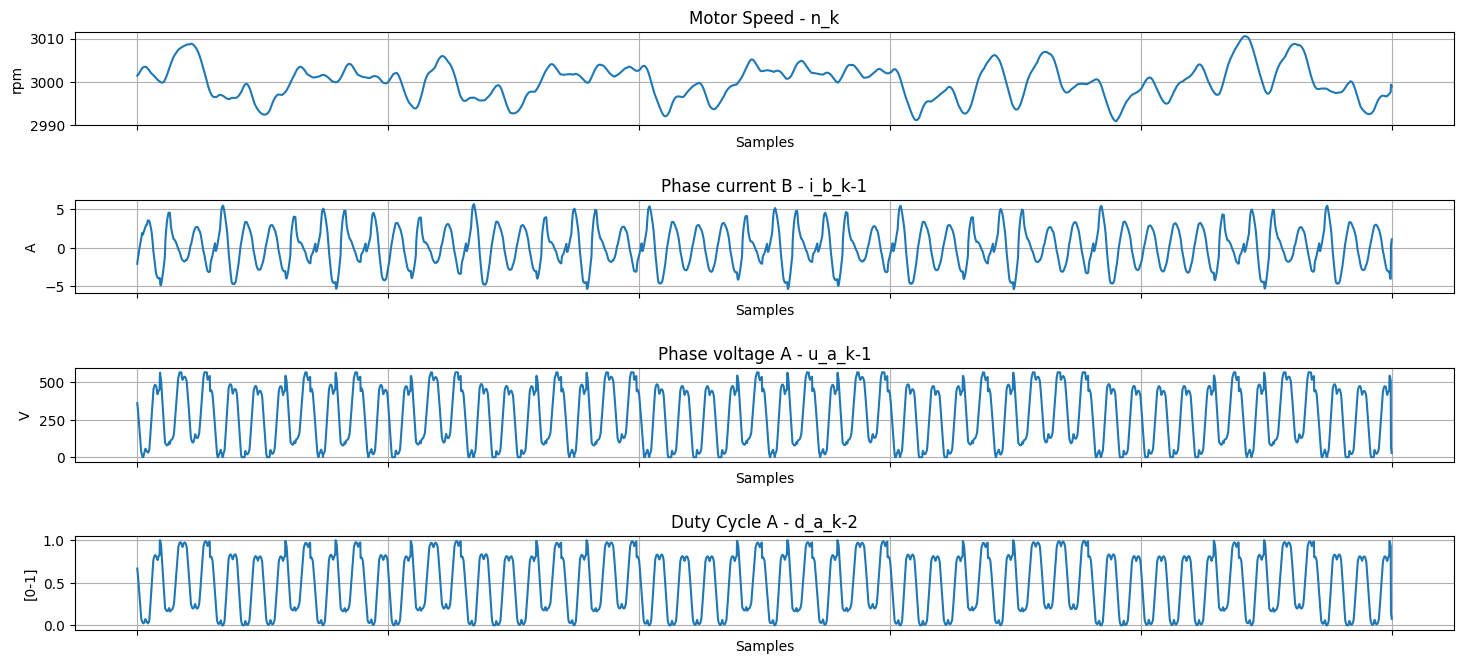

In [8]:
p_sample= 5000

col_iak1=data['n_k'].head(p_sample)
p_iak1 = plt.subplot(4,1,1)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Motor Speed - n_k')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('rpm')

col_iak1=data['i_b_k-1'].head(p_sample)
p_iak1 = plt.subplot(4,1,2)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Phase current B - i_b_k-1')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('A')

col_iak1=data['u_a_k-1'].head(p_sample)
p_iak1 = plt.subplot(4,1,3)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Phase voltage A - u_a_k-1')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('V')

col_iak1=data['d_a_k-2'].head(p_sample)
p_iak1 = plt.subplot(4,1,4)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Duty Cycle A - d_a_k-2')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('[0-1]')

plt.tight_layout(pad=2.0)


In [9]:
data.corr()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
n_k,1.000000,-0.428551,-0.428544,-0.428539,-0.428535,0.000976,0.004075,0.003156,0.000992,0.004068,...,0.003129,0.000401,0.002339,0.002103,0.000409,0.002361,0.002084,-0.012105,-0.010189,-0.010992
u_dc_k,-0.428551,1.000000,0.997913,0.995965,0.993376,-0.006246,-0.002922,0.001044,-0.006376,-0.002761,...,0.001014,-0.004242,-0.007184,-0.006002,-0.004491,-0.007542,-0.006160,0.020417,0.017191,0.019000
u_dc_k-1,-0.428544,0.997913,1.000000,0.997913,0.995965,-0.006257,-0.002985,0.001125,-0.006325,-0.002871,...,0.001044,-0.004099,-0.006936,-0.005845,-0.004279,-0.007226,-0.005933,0.020601,0.017474,0.019218
u_dc_k-2,-0.428539,0.995965,0.997913,1.000000,0.997913,-0.006239,-0.003082,0.001196,-0.006334,-0.002937,...,0.001087,-0.004000,-0.006716,-0.005720,-0.004135,-0.006979,-0.005777,0.020713,0.017721,0.019377
u_dc_k-3,-0.428535,0.993376,0.995965,0.997913,1.000000,-0.006220,-0.003179,0.001260,-0.006322,-0.003034,...,0.001124,-0.003913,-0.006529,-0.005625,-0.004039,-0.006762,-0.005647,0.020793,0.017902,0.019476
i_a_k,0.000976,-0.006246,-0.006257,-0.006239,-0.006220,1.000000,-0.481779,-0.524303,0.998620,-0.517190,...,-0.413571,0.465385,0.327131,-0.785642,0.500605,0.287640,-0.783464,0.375554,0.395191,-0.763603
i_b_k,0.004075,-0.002922,-0.002985,-0.003082,-0.003179,-0.481779,1.000000,-0.493433,-0.444973,0.998566,...,-0.594599,-0.796127,0.487990,0.328403,-0.792778,0.523621,0.288071,-0.776911,0.398484,0.395154
i_c_k,0.003156,0.001044,0.001125,0.001196,0.001260,-0.524303,-0.493433,1.000000,-0.558727,-0.456837,...,0.988167,0.311639,-0.800406,0.462645,0.273236,-0.795780,0.499664,0.381857,-0.781295,0.375726
i_a_k-1,0.000992,-0.006376,-0.006325,-0.006334,-0.006322,0.998620,-0.444973,-0.558727,1.000000,-0.481756,...,-0.451505,0.428608,0.365535,-0.785042,0.465333,0.327124,-0.785621,0.337213,0.431479,-0.759405
i_b_k-1,0.004068,-0.002761,-0.002871,-0.002937,-0.003034,-0.517190,0.998566,-0.456837,-0.481756,1.000000,...,-0.562438,-0.796770,0.450686,0.367540,-0.796138,0.488020,0.328405,-0.773716,0.359517,0.432227


A correlation map has been created in order to evaluate the correlation between the different predictors and highlight the ones with highest relevance. We initially worked on building the training/test sets by using the whole predictors data and subsequently removing the predictors with lower correlation, measuring the difference in terms of accuracy.

The map shows the followings:

The motor speed (n_k) is correlated with dc voltages only (u_dc) and viceversa;
Almost no correlation is found between motor speed and dc voltages with phase currents (a,b,c) and phase voltages (a,b,c);
Phase currents (a,b,c) are correlated with duty cycles

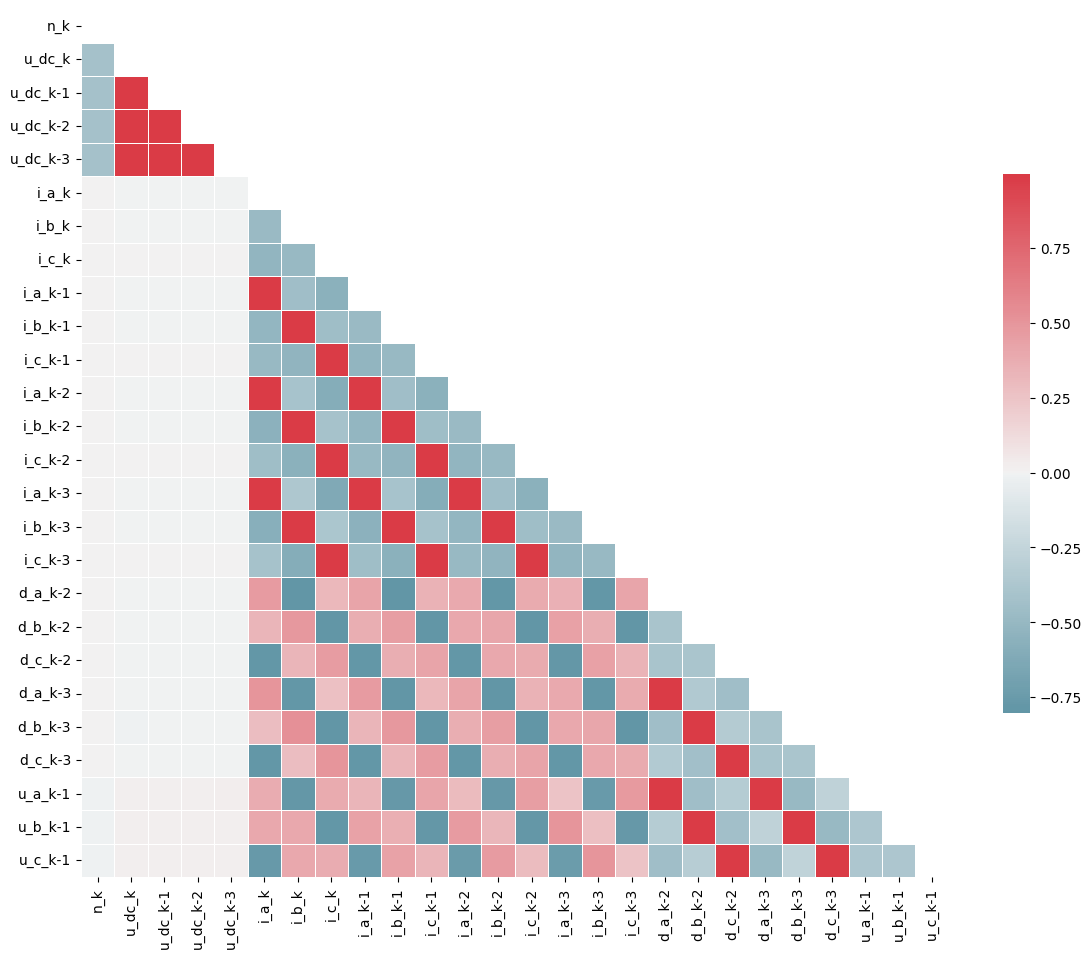

In [10]:
corr=data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(14,14))
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


With the following plot we can visualize the correlation. The most correlated variables show variables close to the bisector while uncorrelated variables show chaotic patterns.



array([[<Axes: xlabel='u_a_k-1', ylabel='u_a_k-1'>,
        <Axes: xlabel='n_k', ylabel='u_a_k-1'>,
        <Axes: xlabel='i_a_k', ylabel='u_a_k-1'>,
        <Axes: xlabel='i_b_k', ylabel='u_a_k-1'>,
        <Axes: xlabel='i_c_k', ylabel='u_a_k-1'>,
        <Axes: xlabel='d_a_k-2', ylabel='u_a_k-1'>,
        <Axes: xlabel='d_b_k-2', ylabel='u_a_k-1'>,
        <Axes: xlabel='d_c_k-2', ylabel='u_a_k-1'>],
       [<Axes: xlabel='u_a_k-1', ylabel='n_k'>,
        <Axes: xlabel='n_k', ylabel='n_k'>,
        <Axes: xlabel='i_a_k', ylabel='n_k'>,
        <Axes: xlabel='i_b_k', ylabel='n_k'>,
        <Axes: xlabel='i_c_k', ylabel='n_k'>,
        <Axes: xlabel='d_a_k-2', ylabel='n_k'>,
        <Axes: xlabel='d_b_k-2', ylabel='n_k'>,
        <Axes: xlabel='d_c_k-2', ylabel='n_k'>],
       [<Axes: xlabel='u_a_k-1', ylabel='i_a_k'>,
        <Axes: xlabel='n_k', ylabel='i_a_k'>,
        <Axes: xlabel='i_a_k', ylabel='i_a_k'>,
        <Axes: xlabel='i_b_k', ylabel='i_a_k'>,
        <Axes: xlabel='i_c

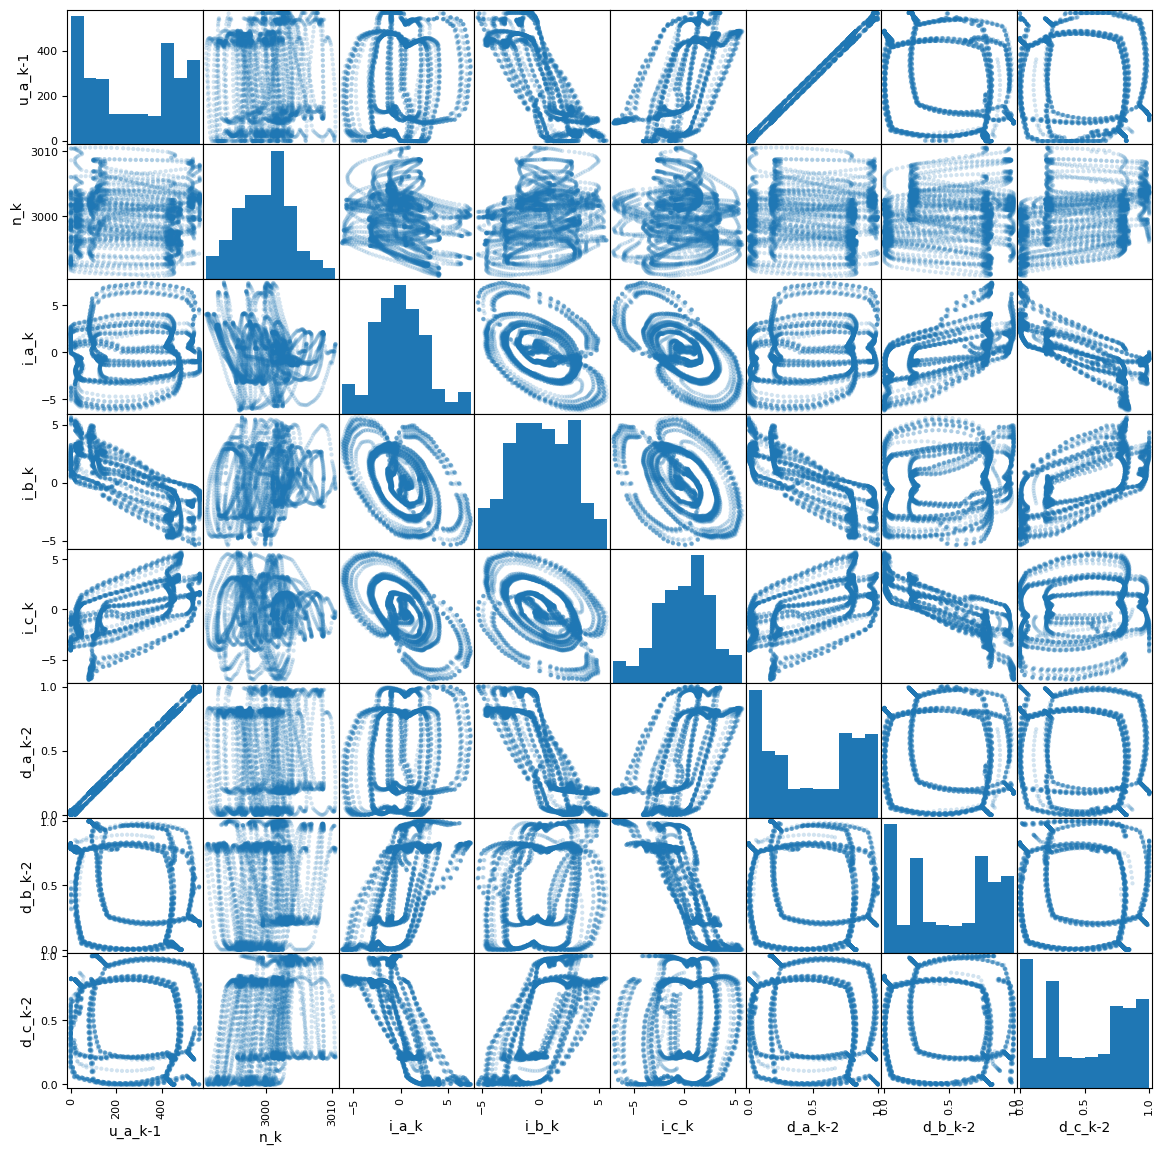

In [11]:
p_5 = data[['u_a_k-1','n_k','i_a_k','i_b_k',
                'i_c_k','d_a_k-2','d_b_k-2','d_c_k-2']].head(5000)
pd.plotting.scatter_matrix(p_5, alpha=0.2, figsize=(14,14))


In [3]:
dfx1 = data.iloc[:,0:-3]
#dfy1 = data_raw[['u_a_k-1','u_b_k-1','u_c_k-1']]
dfy1 = data.iloc[:,-3:-2]

In [4]:
dfx1.head(10)

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-2,i_a_k-3,i_b_k-3,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,-1.792057,-0.716639,2.729208,-2.098439,...,-0.758263,3.045093,-2.484426,-0.613965,0.667181,0.874633,0.125367,0.706206,0.862754,0.137246
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,-1.556948,-0.757338,2.461991,-1.792057,...,-0.698139,3.119473,-2.414078,-0.758263,0.642184,0.880046,0.119954,0.667181,0.874633,0.125367
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,-1.332946,-0.840587,2.292110,-1.556948,...,-0.716639,2.729208,-2.098439,-0.698139,0.611911,0.884307,0.115693,0.642184,0.880046,0.119954
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,-1.135788,-0.925686,2.155288,-1.332946,...,-0.757338,2.461991,-1.792057,-0.716639,0.578149,0.888915,0.111085,0.611911,0.884307,0.115693
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,-0.918266,-1.027434,2.048768,-1.135788,...,-0.840587,2.292110,-1.556948,-0.757338,0.541979,0.892123,0.107877,0.578149,0.888915,0.111085
5,3001.693049,567.579204,567.579204,567.653039,567.911462,1.863278,-0.710000,-1.137507,1.952350,-0.918266,...,-0.925686,2.155288,-1.332946,-0.840587,0.504439,0.894707,0.105293,0.541979,0.892123,0.107877
6,3001.752952,567.689956,567.579204,567.579204,567.653039,1.767777,-0.498957,-1.276255,1.863278,-0.710000,...,-1.027434,2.048768,-1.135788,-0.925686,0.465802,0.895410,0.104590,0.504439,0.894707,0.105293
7,3001.873562,567.505369,567.689956,567.579204,567.579204,1.690643,-0.261997,-1.414078,1.767777,-0.498957,...,-1.137507,1.952350,-0.918266,-1.027434,0.426395,0.894788,0.105212,0.465802,0.895410,0.104590
8,3001.996791,567.653039,567.505369,567.689956,567.579204,1.613508,-0.060210,-1.554676,1.690643,-0.261997,...,-1.276255,1.863278,-0.710000,-1.137507,0.386276,0.892363,0.107637,0.426395,0.894788,0.105212
9,3002.113320,567.874544,567.653039,567.505369,567.689956,1.545556,0.116585,-1.677699,1.613508,-0.060210,...,-1.414078,1.767777,-0.498957,-1.276255,0.345641,0.888466,0.111534,0.386276,0.892363,0.107637


In [8]:
dfy1.head()

,u_a_k-1
0,360.541201
1,346.410081
2,329.440240
3,311.058880
4,290.481760


Data standardization

In order to have all the input variables on the same scale we perform standardization. This is fundamental for algorithms that use weights for assuring that each variable contributes equally.

In our case k-nearest neighbours and artificial neural network must use standardized input variables. Tree based algorithms (in our case decision tree, pruning and random forest) are insensitive to this problem since they classify based on punctual values and do not make any weighted operation.

In [5]:
scaler = preprocessing.StandardScaler()
scaler.fit(dfx1)
dfx1=scaler.transform(dfx1)
dfx1 = pd.DataFrame(dfx1)

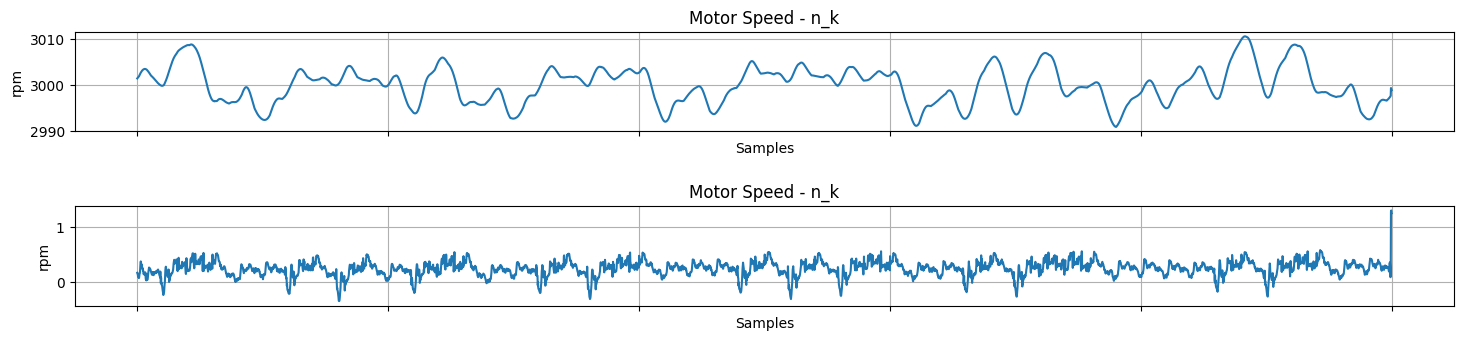

In [17]:
p_sample= 5000

col_iak1=data['n_k'].head(p_sample)
p_iak1 = plt.subplot(4,1,1)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Motor Speed - n_k')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('rpm')

col_iak1=dfx1[1].head(p_sample)
p_iak1 = plt.subplot(4,1,2)
col_iak1.plot(use_index = True, figsize = (15,7))
plt.setp(p_iak1.get_xticklabels(), visible=False)
plt.title('Motor Speed - n_k')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('rpm')

plt.tight_layout(pad=2.0)

In [10]:
dfx1.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.173846,0.169997,0.110823,0.059042,0.162522,1.119190,-0.827860,-0.319306,1.240764,-0.970029,...,-0.338138,1.384562,-1.149176,-0.273049,0.787613,1.768045,-1.769945,0.971770,1.711964,-1.713850
1,1.173903,0.155211,0.169969,0.110796,0.059011,1.041949,-0.718781,-0.337670,1.119258,-0.827876,...,-0.311008,1.418388,-1.116534,-0.338163,0.669657,1.793609,-1.795508,0.787618,1.768065,-1.769949
2,1.173958,0.155211,0.155183,0.169943,0.110766,0.979739,-0.614855,-0.375232,1.042012,-0.718792,...,-0.319356,1.240908,-0.970073,-0.311032,0.526803,1.813737,-1.815635,0.669659,1.793630,-1.795512
3,1.174011,0.103461,0.155183,0.155157,0.169915,0.931306,-0.523383,-0.413630,0.979797,-0.614861,...,-0.337721,1.119386,-0.827906,-0.319380,0.367491,1.835496,-1.837393,0.526802,1.813757,-1.815639
4,1.174062,0.088675,0.103430,0.155157,0.155128,0.887467,-0.422463,-0.459540,0.931361,-0.523385,...,-0.375286,1.042130,-0.718812,-0.337746,0.196814,1.850646,-1.852543,0.367486,1.835516,-1.837397


END

MSE (Mean Square Error): it indicates the averaged squared difference between estimated data and observed data.

RMSE (Root Mean Square Error): it is the sqaured root of the mse.

MAE (Mean absolute error): it is the average of the difference between estimated and observed data.

R2 (coefficient of determination): it is the ratio between the deviance of the predicted data and the one of the real data. The closer to 1 the more accurate is the model.

K-Fold

K-fold method aims to randomly split our dataset into k folds of equal size, (k-1)/k data portion will be used for training while 1/k portion of data will be used for test. This procedure is repeated k times changing the data portion, each time the model accuracy is computed and finally averaged.

K-fold is used to avoid dataset splitting dependence on model training accuracy. In this way we can have a reasonable result indepently from the data partition in training and validation sets.

KFOLD ON Decision Tree 

In [35]:
k_arr = [2,5,10,15,20]


kf_avg_mse_train=[]
kf_avg_rmse_train=[]
kf_avg_r2_train=[]
kf_avg_mape_train=[]

kf_avg_mse_test=[]
kf_avg_rmse_test=[]
kf_avg_r2_test=[]
kf_avg_mape_test=[]

kf_fold_arr=[]

for k in k_arr:

            kf = KFold(n_splits=k, random_state=None)
            rt = DecisionTreeRegressor(max_depth=15)

            mse_score_train = []
            rmse_score_train = []
            r2_score_train = []
            mape_score_train = []

            mse_score_test = []
            rmse_score_test = []
            r2_score_test = []
            mape_score_test = []

            for train_index , test_index in kf.split(dfx1):
                X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
                y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
                
                rt.fit(X_train,y_train)

                y_pred_train = rt.predict(X_train)
                y_pred_test = rt.predict(X_test)
                
                mse_train = metrics.mean_squared_error(y_train, y_pred_train)
                mse_score_train.append(mse_train)
                rmse_train = np.sqrt(mse_train)
                rmse_score_train.append(rmse_train)
                r2_train = r2_score(y_train, y_pred_train)
                r2_score_train.append(r2_train)
                mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
                mape_score_train.append(mape_train)

                mse_test = metrics.mean_squared_error(y_test, y_pred_test)
                mse_score_test.append(mse_test)
                rmse_test = np.sqrt(mse_test)
                rmse_score_test.append(rmse_test)
                r2_test = r2_score(y_test, y_pred_test)
                r2_score_test.append(r2_test)
                mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
                mape_score_test.append(mape_test)
                
            kf_fold_arr.append(k)

            kf_avg_mse_train.append(sum(mse_score_train)/k)
            kf_avg_rmse_train.append(sum(rmse_score_train)/k)
            kf_avg_r2_train.append(sum(r2_score_train)/k)
            kf_avg_mape_train.append(sum(mape_score_train)/k)

            kf_avg_mse_test.append(sum(mse_score_test)/k)
            kf_avg_rmse_test.append(sum(rmse_score_test)/k)
            kf_avg_r2_test.append(sum(r2_score_test)/k)
            kf_avg_mape_test.append(sum(mape_score_test)/k)


In [36]:
print("Depth: ",kf_fold_arr)

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(kf_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(kf_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(kf_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(kf_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(kf_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(kf_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(kf_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(kf_avg_mape_test),2))

Depth:  [2, 5, 10, 15, 20]
TRAINING
Mean Squared Error: [0.3 0.4 0.4 0.4 0.4]
Root Mean Squared Error: [0.53 0.61 0.63 0.62 0.62]
R Squared Score is: [1. 1. 1. 1. 1.]
Mean absolute error is: [0.34 0.42 0.44 0.44 0.44]
TEST
Mean Squared Error: [731.9   8.7   5.6   4.8   5.3]
Root Mean Squared Error: [22.29  2.76  2.14  1.97  1.93]
R Squared Score is: [0.961 0.998 0.998 0.999 0.999]
Mean absolute error is: [12.12  1.66  1.29  1.21  1.19]


In [18]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(kf_fold_arr[1:5],kf_avg_rmse_train[1:5],label='Training')
plt.bar(list(map(lambda x: x +1 , kf_fold_arr[1:5])),kf_avg_mse_test[1:5],label='Test')
plt.xlabel('k')
plt.ylabel('mse')
plt.xticks(list(map(lambda x: x +0.5 , kf_fold_arr[1:5])) ,[5,10,15,20])
plt.grid()
plt.legend()
plt.title('k-Fold Sensitivity Analysis')

NameError: name 'kf_fold_arr' is not defined

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'k-Fold Sensitivity Analysis')

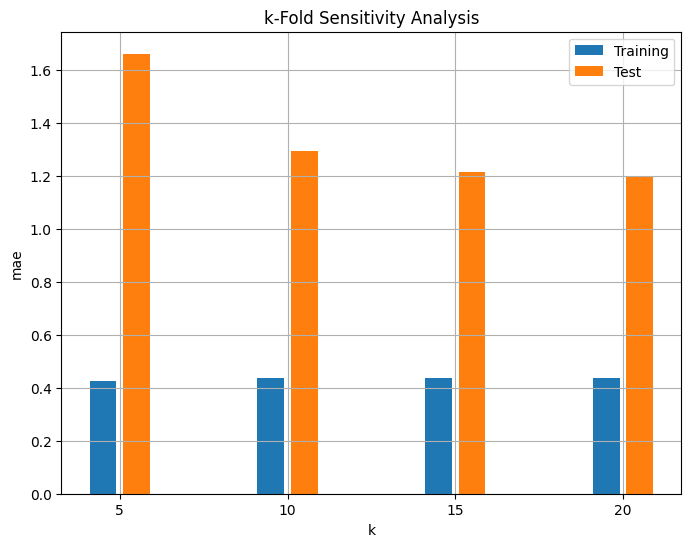

In [52]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(kf_fold_arr[1:5],kf_avg_mape_train[1:5],label='Training')
plt.bar(list(map(lambda x: x +1 , kf_fold_arr[1:5])),kf_avg_mape_test[1:5],label='Test')
plt.xlabel('k')
plt.ylabel('mae')
plt.xticks(list(map(lambda x: x +0.5 , kf_fold_arr[1:5])) ,[5,10,15,20])
plt.grid()
plt.legend()
plt.title('k-Fold Sensitivity Analysis')

K-Fold - Sensitivity analysis results

After training a decision tree model with different k values [2 5 10 15 20] we can infer that 15 gives the highest model accuracy. However results given by 10 and 20 are very similar, thus the best trade-off would be using 10.

Due to computational reasons k=5 will be used for training the other models. It has to be considered also that the mean absolute error resulting from k=5 is 1.66V, that is already fine for our purpose.

Decision Trees¶

Tree methods are simple methods that divide the predictor space in different areas depending on particular conditions that are found during the training phase.

The training depth, the number of levels of the tree, influences the model accuracy. If the number of levels is too high, the model will overfit, if it is too low, the model will have low accuracy.

In order to find the best trade-off between accuracy and overfitting, different values of tree depth have been used, the one with the lowest test scores (mse) has been finally selected.

Sensitivity analysis done varying max tree depth with:

5
10
15
20
25
The minimum mse is achieved with tree depth = 25 (8.6), however it is very similar to the mse (8.8) found with tree depth = 15. The mean absolute error with tree depth = 15 is 1.66 V, which is accurate enough for a inverter black-box model.

It can be seen that the accuracy found during the training is increasing together with the tree depth while the test accuracy is almost stable after tree depth = 15. Thus, we can infer that the model is going to overfit increasing the tree depth.



In [49]:
k = 5
dt_tree_arr=[5,10,15,20,25]

dt_depth_arr=[]

dt_avg_mse_train=[]
dt_avg_rmse_train=[]
dt_avg_r2_train=[]
dt_avg_mape_train=[]

dt_avg_mse_test=[]
dt_avg_rmse_test=[]
dt_avg_r2_test=[]
dt_avg_mape_test=[]

for depth in dt_tree_arr:

            kf = KFold(n_splits=k, random_state=None)
            rt = DecisionTreeRegressor(max_depth=depth)

            mse_score_train = []
            rmse_score_train = []
            r2_score_train = []
            mape_score_train = []

            mse_score_test = []
            rmse_score_test = []
            r2_score_test = []
            mape_score_test = []

            for train_index , test_index in kf.split(dfx1):
                X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
                y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
                
                rt.fit(X_train,y_train)

                y_pred_train = rt.predict(X_train)
                y_pred_test = rt.predict(X_test)
                
                mse_train = metrics.mean_squared_error(y_train, y_pred_train)
                mse_score_train.append(mse_train)
                rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
                rmse_score_train.append(rmse_train)
                r2_train = r2_score(y_train, y_pred_train)
                r2_score_train.append(r2_train)
                mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
                mape_score_train.append(mape_train)

                mse_test = metrics.mean_squared_error(y_test, y_pred_test)
                mse_score_test.append(mse_test)
                rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
                rmse_score_test.append(rmse_test)
                r2_test = r2_score(y_test, y_pred_test)
                r2_score_test.append(r2_test)
                mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
                mape_score_test.append(mape_test)
                
            dt_depth_arr.append(depth)

            dt_avg_mse_train.append(sum(mse_score_train)/k)
            dt_avg_rmse_train.append(sum(rmse_score_train)/k)
            dt_avg_r2_train.append(sum(r2_score_train)/k)
            dt_avg_mape_train.append(sum(mape_score_train)/k)

            dt_avg_mse_test.append(sum(mse_score_test)/k)
            dt_avg_rmse_test.append(sum(rmse_score_test)/k)
            dt_avg_r2_test.append(sum(r2_score_test)/k)
            dt_avg_mape_test.append(sum(mape_score_test)/k)

In [54]:
print("Depth: ",dt_depth_arr)

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(dt_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(dt_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(dt_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(dt_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(dt_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(dt_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(dt_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(dt_avg_mape_test),2))

Depth:  [5, 10, 15, 20, 25]
TRAINING
Mean Squared Error: [110.6   4.3   0.4   0.    0. ]
Root Mean Squared Error: [10.49  2.06  0.61  0.2   0.06]
R Squared Score is: [0.991 1.    1.    1.    1.   ]
Mean absolute error is: [8.25 1.48 0.42 0.1  0.01]
TEST
Mean Squared Error: [154.6  14.3   8.9   8.5   8.6]
Root Mean Squared Error: [12.32  3.64  2.79  2.72  2.72]
R Squared Score is: [0.953 0.997 0.998 0.998 0.998]
Mean absolute error is: [9.8  2.43 1.66 1.59 1.6 ]


Text(0.5, 1.0, 'k-Fold Sensitivity Analysis')

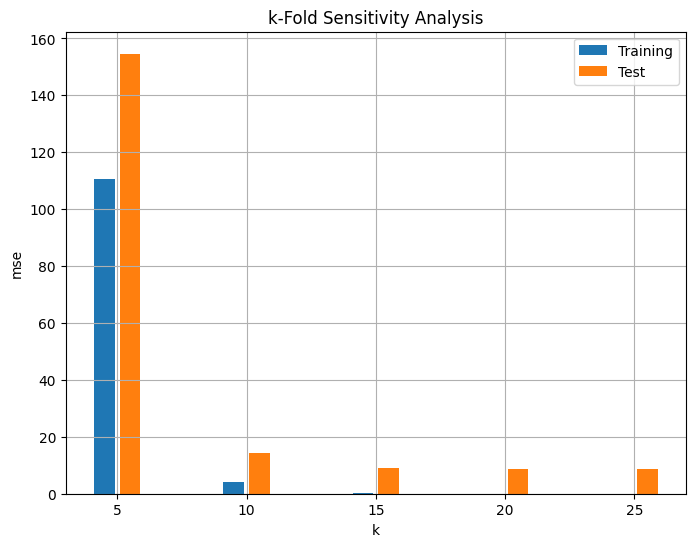

In [61]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(dt_tree_arr,dt_avg_mse_train,label='Training')
plt.bar(list(map(lambda x: x +1 , dt_tree_arr)),dt_avg_mse_test,label='Test')
plt.xlabel('k')
plt.ylabel('mse')
plt.xticks(list(map(lambda x: x +0.5 , dt_tree_arr)) ,[5,10,15,20,25])
plt.grid()
plt.legend()
plt.title('k-Fold Sensitivity Analysis')

Text(0.5, 1.0, 'k-Fold Sensitivity Analysis')

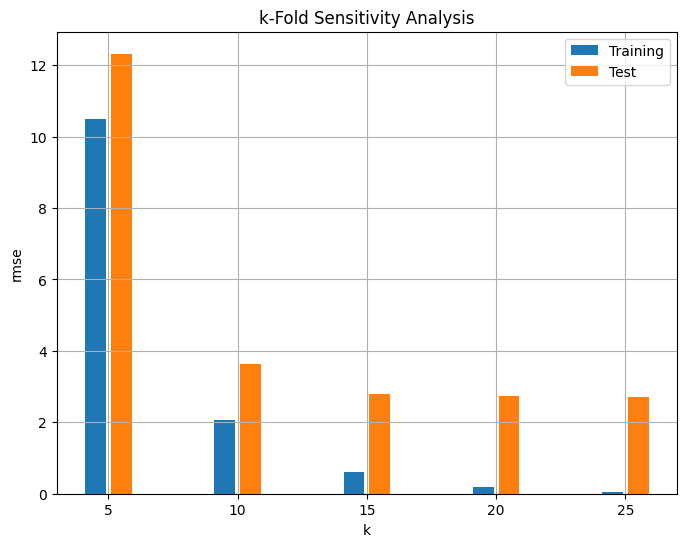

In [59]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(dt_tree_arr,dt_avg_rmse_train,label='Training')
plt.bar(list(map(lambda x: x +1 , dt_tree_arr)),dt_avg_rmse_test,label='Test')
plt.xlabel('k')
plt.ylabel('rmse')
plt.xticks(list(map(lambda x: x +0.5 , dt_tree_arr)) ,[5,10,15,20,25])
plt.grid()
plt.legend()
plt.title('k-Fold Sensitivity Analysis')

In [3]:
rt_final = DecisionTreeRegressor(max_depth=15)
rt_final.fit(X_train,y_train)
y_pred_train = rt.predict(X_train)
y_pred_test = rt.predict(X_test)

NameError: name 'X_train' is not defined

Text(0.5, 1.0, 'Decision Tree - Predicted')

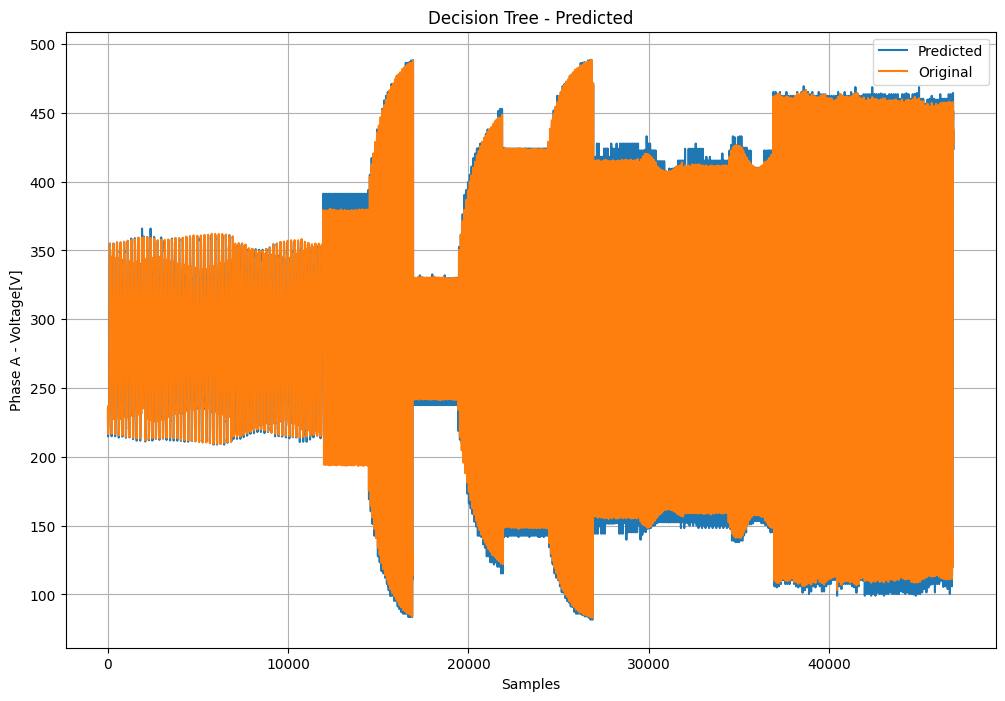

In [73]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
a=np.arange(start=0, stop=len(y_pred_test), step=1)
plt.plot(a,y_pred_test,label='Predicted')
plt.plot(a,y_test,label='Original')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('Phase A - Voltage[V]')
plt.legend()
plt.title('Decision Tree - Predicted')

In [86]:
type(y_test)    

pandas.core.frame.DataFrame

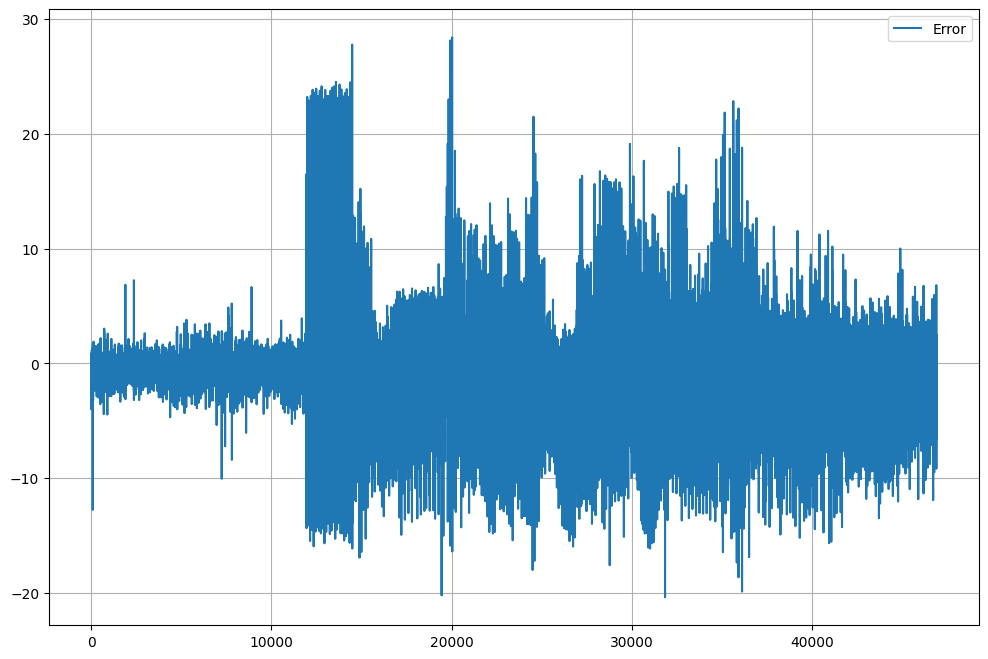

In [88]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
a=np.arange(start=0, stop=len(y_pred_test), step=1)
y = list()
for i in range(0,len(y_test)):
        y.append(y_pred_test[i]-y_test.iloc[i:i+1 , 0])

plt.plot(a,y,label='Error')
plt.grid()
plt.legend()



C:\Users\dsmat\AppData\Local\Temp\ipykernel_20912\197455955.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


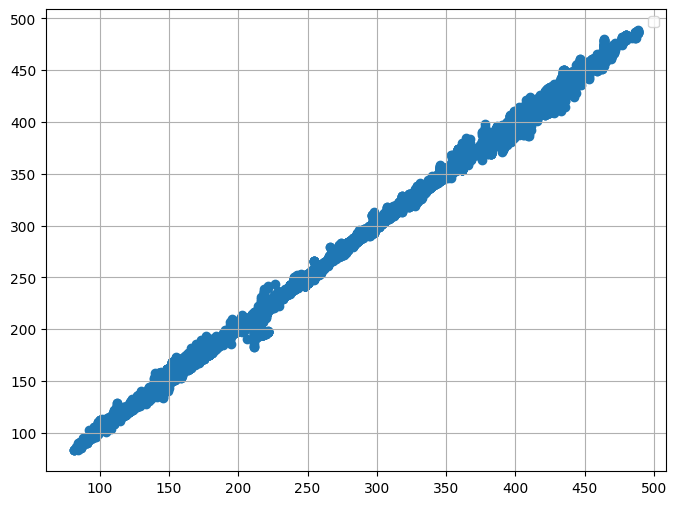

In [89]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(y_pred_test,y_test)
plt.grid()
plt.legend()

Pruning¶

Decision tree methods may produce good predictions on the training set, but they are likely to overfit the data, leading to poor test set performance.

This is because the resulting tree might be too complex. A smaller tree with fewer splits might lead to lower variance. A better strategy is to grow a very large tree, and then prune it back in order to obtain a subtree.

The subtrees set are found with the so called "cost complexity pruning": rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter α.

C:\Users\dsmat\AppData\Local\Temp\ipykernel_20912\2540237553.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Pruning - Alpha Parameter')

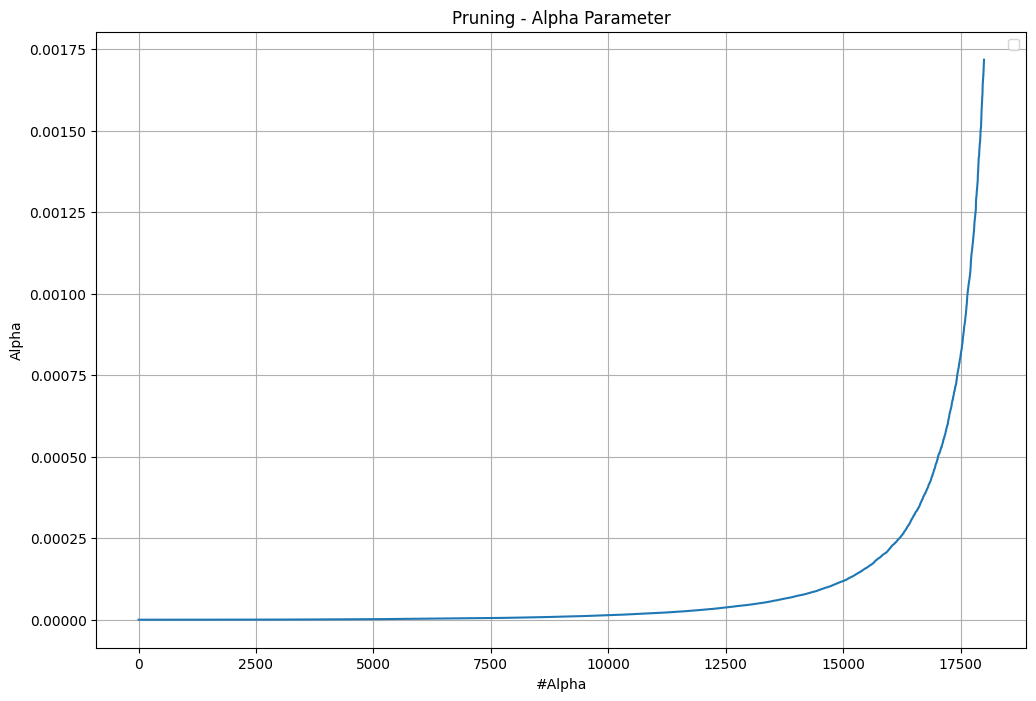

In [91]:
#it computes every alpha
pruning = rt_final.cost_complexity_pruning_path(X_train,y_train)
pruning

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#the plot is done only until #alpha 18000 in order to have a better view
plt.plot(pruning.ccp_alphas[:18000])
plt.grid()
plt.xlabel('#Alpha')
plt.ylabel('Alpha')
plt.legend()
plt.title('Pruning - Alpha Parameter')

Since our computational power is limited we decided to take only few values of alpha in the range between 0 and 18000 with step 1000, where the variation is higher so we can easily spot the effects of pruning.

Pruning Start

In [93]:
ccp_alphas, impurities = pruning.ccp_alphas, pruning.impurities
clfs = []
k=5
kf = KFold(n_splits=k, random_state=None)
alpha_selected = []

pr_avg_mse_train=[]
pr_avg_rmse_train=[]
pr_avg_r2_train=[]
pr_avg_mae_train=[]

pr_avg_mse_test=[]
pr_avg_rmse_test=[]
pr_avg_r2_test=[]
pr_avg_mae_test=[]


for i in range(0,18000,1000):

    pr_Training_mse = []
    pr_Training_rmse = []
    pr_Training_r2 = []
    pr_Training_mae = []

    pr_Test_mse = []
    pr_Test_rmse = []
    pr_Test_r2 = []
    pr_Test_mae = []

    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alphas[i],max_depth=15)
    alpha_selected.append(ccp_alphas[i])

    for train_index , test_index in kf.split(dfx1):
                X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
                y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
                clf.fit(X_train, y_train)
                
                y_pred_train = clf.predict(X_train)
                y_pred_test = clf.predict(X_test)
                
                pr_Training_mse.append(metrics.mean_squared_error(y_train, y_pred_train))
                pr_Training_rmse.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
                pr_Training_r2.append(r2_score(y_train, y_pred_train))
                pr_Training_mae.append(metrics.mean_absolute_error(y_train, y_pred_train))

                pr_Test_mse.append(metrics.mean_squared_error(y_test, y_pred_test))
                pr_Test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
                pr_Test_r2.append(r2_score(y_test, y_pred_test))
                pr_Test_mae.append(metrics.mean_absolute_error(y_test, y_pred_test))

    clfs.append(clf)#taking only the last model
    pr_avg_mse_train.append(sum(pr_Training_mse)/k)
    pr_avg_rmse_train.append(sum(pr_Training_rmse)/k)
    pr_avg_r2_train.append(sum(pr_Training_r2)/k)
    pr_avg_mae_train.append(sum(pr_Training_mae)/k)

    pr_avg_mse_test.append(sum(pr_Test_mse)/k)
    pr_avg_rmse_test.append(sum(pr_Test_rmse)/k)
    pr_avg_r2_test.append(sum(pr_Test_r2)/k)
    pr_avg_mae_test.append(sum(pr_Test_mae)/k)

KeyboardInterrupt: 

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(alpha_selected, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(alpha_selected, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
print("Alpha: ",np.around(np.array(alpha_selected),9))

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(pr_avg_mse_train),5))
print("Root Mean Squared Error:",np.around(np.array(pr_avg_rmse_train),5))
print("R Squared Score is:", np.around(np.array(pr_avg_r2_train),5))
print("Mean absolute error is:", np.around(np.array(pr_avg_mae_train),5))

print("TEST")
print("Mean Squared Error:", np.around(np.array(pr_avg_mse_test),5))
print("Root Mean Squared Error:",np.around(np.array(pr_avg_rmse_test),5))
print("R Squared Score is:", np.around(np.array(pr_avg_r2_test),5))
print("Mean absolute error is:", np.around(np.array(pr_avg_mae_test),5))

In [ ]:
#the plot is done only until #alpha 18000 in order to have a better view
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('#alpha')
ax1.set_ylabel('TRAINING MSE', color=color)
ax1.plot(range(1,19),pr_avg_mse_train,'r-')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(range(1,19))
ax1.set_ylim([0,2])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('TEST MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,19),pr_avg_mse_test, 'b-')
ax2.tick_params(axis='y', labelcolor=color)
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#the plot is done only until #alpha 18000 in order to have a better view
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('#alpha')
ax1.set_ylabel('TRAINING MAE', color=color)
ax1.plot(range(1,19),pr_avg_mse_train,'r-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,2])
plt.xticks(range(1,19))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('TEST MAE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,19),pr_avg_mae_train, 'b-')
ax2.tick_params(axis='y', labelcolor=color)
plt.grid()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Pruning Results

The results show that both error and test error increase with a higher level of pruning. With alpha=2.73500e-06 the mean absolute error slightly reduces from 1.65639 to 1.65465, significantly decreasing the number of nodes (around -20%).

Pruning END

Random Forest

Classification trees have an instrinsic problem related to high variance. One of the most common method for avoiding it is the so called bootstrap aggregation or bagging, that is used to reduce the variance of a statistical learning method. This method is based on the fact that averaging a set of observations reduces the variance, thus we should find a way to have multiple data-set, to build a model for each of them and then to average the results. Since we do not always have multiple data-set we "artificially" create them with the bootstrapping technique. However bagging method can create high correlated trees that are not very useful to reduce variance. An upgrade of bagging is the random forest method. The latter is very similar, it creates dataset by means of the bootstrapping technique but, when it creates a tree for each dataset, it considers for each split of the tree a subset of variables (usually sqrt(p), where p is the total number of variables). This "reduction" allows to decorelate the trees and, thus, to decrease the variance.

In order to see the effect of the tree depth on the results, an array with different depths has been taken [5,10,15,20,25]. The array is equal to the one used in the decision tree study.



See this Random Forest in notebook 

In [96]:
k = 5
kf = KFold(n_splits=k, random_state=None)

# tree_arr=[5,10,15,20,25]

tree_arr=[20,25]
rf_depth_arr=[]

rf_avg_mse_train=[]
rf_avg_rmse_train=[]
rf_avg_r2_train=[]
rf_avg_mape_train=[]

rf_avg_mse_test=[]
rf_avg_rmse_test=[]
rf_avg_r2_test=[]
rf_avg_mape_test=[]

for depth in tree_arr:

        random_forest = RandomForestRegressor(max_depth=depth, random_state=0)

        mse_score_train = []
        rmse_score_train = []
        r2_score_train = []
        mape_score_train = []

        mse_score_test = []
        rmse_score_test = []
        r2_score_test = []
        mape_score_test = []
        
        for train_index , test_index in kf.split(dfx1):

            X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
            y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
            
            
            random_forest.fit(X_train, y_train)

            y_pred_train = random_forest.predict(X_train)
            y_pred_test = random_forest.predict(X_test)
            
            mse_train = metrics.mean_squared_error(y_train, y_pred_train)
            mse_score_train.append(mse_train)
            rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
            rmse_score_train.append(rmse_train)
            r2_train = r2_score(y_train, y_pred_train)
            r2_score_train.append(r2_train)
            mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
            mape_score_train.append(mape_train)

            mse_test = metrics.mean_squared_error(y_test, y_pred_test)
            mse_score_test.append(mse_test)
            rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
            rmse_score_test.append(rmse_test)
            r2_test = r2_score(y_test, y_pred_test)
            r2_score_test.append(r2_test)
            mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
            mape_score_test.append(mape_test)
            
        rf_depth_arr.append(depth)

        rf_avg_mse_train.append(sum(mse_score_train)/k)
        rf_avg_rmse_train.append(sum(rmse_score_train)/k)
        rf_avg_r2_train.append(sum(r2_score_train)/k)
        rf_avg_mape_train.append(sum(mape_score_train)/k)

        rf_avg_mse_test.append(sum(mse_score_test)/k)
        rf_avg_rmse_test.append(sum(rmse_score_test)/k)
        rf_avg_r2_test.append(sum(r2_score_test)/k)
        rf_avg_mape_test.append(sum(mape_score_test)/k)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
print("Depth: ",rf_depth_arr)

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(rf_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(rf_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(rf_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(rf_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(rf_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(rf_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(rf_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(rf_avg_mape_test),2))

The error measured are always lower with respect to the ones obtained with the decision tree, this proves the better performance of random forest method apart from the higher computational time.

As before the best trade off is obtained with tree depth equal to 15, from which we obtain a MAE of 1.23. The latter could satisfy the requirements of our black box inverter model.



kNN - k-nearest-neighbors¶


KNN regression is an algorithm that approximates the similarity between input variables and the continuous output by averaging the observations in the same neighbourhood.

Given some inputs x0, the algorithm searches for the k nearest values present in the dataset (the most common way is computing the euclidean distance) and it then averages the related output values

The choice of k has a significant effect on the model performance, a low k can lead to low bias but high variance, viceversa an high k leads to high bias and low variance.

In order to understand the effect of k on our model and to see which one fits better a senitivity analysis has been performed.

In [98]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
kf = KFold(n_splits=k, random_state=None)

n_neighbors_arr=[3, 15, 25, 101, 301, 501]

knn_k_arr=[]

knn_avg_mse_train=[]
knn_avg_rmse_train=[]
knn_avg_r2_train=[]
knn_avg_mape_train=[]

knn_avg_mse_test=[]
knn_avg_rmse_test=[]
knn_avg_r2_test=[]
knn_avg_mape_test=[]

for n_neighbors in n_neighbors_arr:

      kNN = KNeighborsRegressor(n_neighbors=n_neighbors)

      mse_score_train = []
      rmse_score_train = []
      r2_score_train = []
      mape_score_train = []

      mse_score_test = []
      rmse_score_test = []
      r2_score_test = []
      mape_score_test = []
      
      for train_index , test_index in kf.split(dfx1):

          X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
          y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
          
          
          kNN.fit(X_train, y_train)

          y_pred_train = kNN.predict(X_train)
          y_pred_test = kNN.predict(X_test)

          mse_train = metrics.mean_squared_error(y_train, y_pred_train)
          mse_score_train.append(mse_train)
          rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
          rmse_score_train.append(rmse_train)
          r2_train = r2_score(y_train, y_pred_train)
          r2_score_train.append(r2_train)
          mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
          mape_score_train.append(mape_train)

          mse_test = metrics.mean_squared_error(y_test, y_pred_test)
          mse_score_test.append(mse_test)
          rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
          rmse_score_test.append(rmse_test)
          r2_test = r2_score(y_test, y_pred_test)
          r2_score_test.append(r2_test)
          mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
          mape_score_test.append(mape_test)

      knn_k_arr.append(n_neighbors)

      knn_avg_mse_train.append(sum(mse_score_train)/k)
      knn_avg_rmse_train.append(sum(rmse_score_train)/k)
      knn_avg_r2_train.append(sum(r2_score_train)/k)
      knn_avg_mape_train.append(sum(mape_score_train)/k)

      knn_avg_mse_test.append(sum(mse_score_test)/k)
      knn_avg_rmse_test.append(sum(rmse_score_test)/k)
      knn_avg_r2_test.append(sum(r2_score_test)/k)
      knn_avg_mape_test.append(sum(mape_score_test)/k)

KeyboardInterrupt: 

In [ ]:
print("Depth: ",knn_k_arr)
print("TRAINING")
print("Mean Squared Error:",np.around(np.array(knn_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(knn_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(knn_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(knn_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(knn_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(knn_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(knn_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(knn_avg_mape_test),2))

These k values used were [3, 15, 25,101,301,501] and they were randomly choosed, we achieved the minimum error with k=15.

In comparison with the aforementioned methods, the mean absolute method is much higher than the others, it would not be employable for our purpose.

ANN - Artificial Neural Network

Artificial Neural Networks are one of the main branches in the machine learning field. They are computational systems that try to replicate the structure of biological neural networks. The main unit is the node (N), which communictes through links (L), with other nodes; the system is a dimensional space where N >> L. The nodes are organized in layers.

The basic structure includes: • An input layer, which receives the inputs to be processed by the system; • One or more intermediate layers (also called hidden); • A final layer that provides the outputs.

The neuron is made up of three fundamental elements:

A variable number of connections characterized by weights;
An adder, which sums the inputs from the various connections based on their weight, producing as output a linear combination of the received inputs;
An activation function that serves to limit the value of the output. Usually the output is between the values ​​[0,1] or [-1,1].
There are several activation functions, the most used are the sigmoid and the ReLu (Rectified Linear Unit).

The neural network training can be done in two different ways: supervised (when the output as well as the input is known) and unsupervised(when only inputs are known).

The error signal activates a self-checking procedure of the system through a series of adjustments of the weight of each connection of the k-th neuron with the aim of reducing the difference between the response generated and the expected response.

1 Layer Architecture

In order to understand which is the optimal number of neurons, we started using only one layer and we varied the number of neurons [5,10,15,20,50]. ReLu were used as activation functions in the hidden layer while linear function was used for the output layer (since output values are unbounded). The epochs were fixed to 150, monitoring the output residuals it was seen that the mean squared error converged to a constant value without significant improvements.

In [100]:
#Determine how many neurons are needed with one layer
#avoiding k-fold
X_train, X_test, y_train, y_test = train_test_split(dfx1, dfy1, test_size=0.25, shuffle=False)

#k=2 to avoid modification to the code with the k-fold
k=1

neuron_Arr=[5,10,15,20,50]

ann_avg_mse_train=[]
ann_avg_rmse_train=[]
ann_avg_r2_train=[]
ann_avg_mape_train=[]

ann_avg_mse_test=[]
ann_avg_rmse_test=[]
ann_avg_r2_test=[]
ann_avg_mape_test=[]

for neuron in neuron_Arr:

      ANN = keras.Sequential([
          keras.layers.Flatten(input_shape=(23,)),  # input layer (1)
          keras.layers.Dense(neuron, activation='relu'),  # hidden layer (2)
          keras.layers.Dense(1, activation='linear') # output layer (3)
      ])


      ANN.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

      keras.callbacks.EarlyStopping(monitor='loss',
                                    min_delta=0.1,
                                    patience=3,
                                    verbose=1, mode='auto')

      mse_score_train = []
      rmse_score_train = []
      r2_score_train = []
      mape_score_train = []

      mse_score_test = []
      rmse_score_test = []
      r2_score_test = []
      mape_score_test = []
             
          
      ANN.fit(X_train,y_train,epochs=150,shuffle=False)

      y_pred_train = ANN.predict(X_train)
      y_pred_test = ANN.predict(X_test)
      

      mse_train = metrics.mean_squared_error(y_train, y_pred_train)
      mse_score_train.append(mse_train)
      rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
      rmse_score_train.append(rmse_train)
      r2_train = r2_score(y_train, y_pred_train)
      r2_score_train.append(r2_train)
      mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
      mape_score_train.append(mape_train)

      mse_test = metrics.mean_squared_error(y_test, y_pred_test)
      mse_score_test.append(mse_test)
      rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
      rmse_score_test.append(rmse_test)
      r2_test = r2_score(y_test, y_pred_test)
      r2_score_test.append(r2_test)
      mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
      mape_score_test.append(mape_test)
          
      ann_avg_mse_train.append(sum(mse_score_train)/k)
      ann_avg_rmse_train.append(sum(rmse_score_train)/k)
      ann_avg_r2_train.append(sum(r2_score_train)/k)
      ann_avg_mape_train.append(sum(mape_score_train)/k)

      ann_avg_mse_test.append(sum(mse_score_test)/k)
      ann_avg_rmse_test.append(sum(rmse_score_test)/k)
      ann_avg_r2_test.append(sum(r2_score_test)/k)
      ann_avg_mape_test.append(sum(mape_score_test)/k)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 5s 740us/step - loss: 77899.8047
Epoch 2/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 752us/step - loss: 11144.2363
Epoch 3/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 749us/step - loss: 6493.2329
Epoch 4/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 743us/step - loss: 4021.7273
Epoch 5/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 742us/step - loss: 2730.9756
Epoch 6/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 3s 583us/step - loss: 1970.2124
Epoch 7/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 3s 532us/step - loss: 1391.1268
Epoch 8/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 734us/step - loss: 983.3224
Epoch 9/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 751us/step - loss: 703.1432
Epoch 10/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 754us/step - loss: 466.0122
Epoch 11/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 4s 693us/step - loss: 249.1571
Epoch 12/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 3s 630us/step - loss: 140.3131
Epoch 13/150
5497/5497 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step - loss: 89.7197
Epoch 14/150
5497/5497 ━━━

KeyboardInterrupt: 

In [ ]:
print("Results with single hidden layer and with", neuron_Arr, "neurons")

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ann_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ann_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_test),2))

The lowest errors were obtained with 15 neurons.



3 Hidden Layers¶

A further analysis with 3 layers has been done with the purpose of understanding if the errors could decrease.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfx1, dfy1, test_size=0.25, shuffle=False)
#k=2 to avoid modification to the code with the k-fold
k=1

neuron_Arr=[5,10,15,20,50]

ann_avg_mse_train=[]
ann_avg_rmse_train=[]
ann_avg_r2_train=[]
ann_avg_mape_train=[]

ann_avg_mse_test=[]
ann_avg_rmse_test=[]
ann_avg_r2_test=[]
ann_avg_mape_test=[]

for neuron in neuron_Arr:

          ANN = keras.Sequential([
              keras.layers.Flatten(input_shape=(23,)),  # input layer (1)
              keras.layers.Dense(neuron, activation='relu'),  # hidden layer (2)
              keras.layers.Dense(neuron, activation='relu'),  # hidden layer (3)
              keras.layers.Dense(neuron, activation='relu'),  # hidden layer (4)
              keras.layers.Dense(1, activation='linear') # output layer (5)
          ])


          ANN.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

          keras.callbacks.EarlyStopping(monitor='loss',
                                        min_delta=0.1,
                                        patience=3,
                                        verbose=1, mode='auto')

          mse_score_train = []
          rmse_score_train = []
          r2_score_train = []
          mape_score_train = []

          mse_score_test = []
          rmse_score_test = []
          r2_score_test = []
          mape_score_test = []
                  
              
          ANN.fit(X_train,y_train,epochs=150,shuffle=False)

          y_pred_train = ANN.predict(X_train)
          y_pred_test = ANN.predict(X_test)


          mse_train = metrics.mean_squared_error(y_train, y_pred_train)
          mse_score_train.append(mse_train)
          rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
          rmse_score_train.append(rmse_train)
          r2_train = r2_score(y_train, y_pred_train)
          r2_score_train.append(r2_train)
          mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
          mape_score_train.append(mape_train)

          mse_test = metrics.mean_squared_error(y_test, y_pred_test)
          mse_score_test.append(mse_test)
          rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
          rmse_score_test.append(rmse_test)
          r2_test = r2_score(y_test, y_pred_test)
          r2_score_test.append(r2_test)
          mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
          mape_score_test.append(mape_test)
              
          ann_avg_mse_train.append(sum(mse_score_train)/k)
          ann_avg_rmse_train.append(sum(rmse_score_train)/k)
          ann_avg_r2_train.append(sum(r2_score_train)/k)
          ann_avg_mape_train.append(sum(mape_score_train)/k)

          ann_avg_mse_test.append(sum(mse_score_test)/k)
          ann_avg_rmse_test.append(sum(rmse_score_test)/k)
          ann_avg_r2_test.append(sum(r2_score_test)/k)
          ann_avg_mape_test.append(sum(mape_score_test)/k)

In [ ]:
print("Results with three hidden layers and with", neuron_Arr, "neurons")

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ann_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ann_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_test),2))

With 3 hidden layers the lowest absolute error is achieved with 50 neurons while the lowest mean squared error is achieved with 10 neurons. On average the results are better with respect to the 1 layer case.

Hidden Layers¶

The training has been repeated with 5 hidden layers, considering the same number of neurons.

In [ ]:
#Determine how many neurons are needed with one layer
#avoiding k-fold
X_train, X_test, y_train, y_test = train_test_split(dfx1, dfy1, test_size=0.25, shuffle=False)
#k=2 to avoid modification to the code with the k-fold
k=1



ann_avg_mse_train=[]
ann_avg_rmse_train=[]
ann_avg_r2_train=[]
ann_avg_mape_train=[]

ann_avg_mse_test=[]
ann_avg_rmse_test=[]
ann_avg_r2_test=[]
ann_avg_mape_test=[]

neuron_Arr=[5,10,15,20,50]

for neuron in neuron_Arr:

        ANN = keras.Sequential([
            keras.layers.Flatten(input_shape=(23,)),  # input layer (1)
            keras.layers.Dense(neuron, activation='relu'),  # hidden layer (1)
            keras.layers.Dense(neuron, activation='relu'),  # hidden layer (2)
            keras.layers.Dense(neuron, activation='relu'),  # hidden layer (3)
            keras.layers.Dense(neuron, activation='relu'),  # hidden layer (4)
            keras.layers.Dense(neuron, activation='relu'),  # hidden layer (5)
            keras.layers.Dense(1, activation='linear') # output layer (7)
        ])


        ANN.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

        keras.callbacks.EarlyStopping(monitor='loss',
                                      min_delta=0.1,
                                      patience=3,
                                      verbose=1, mode='auto')

        mse_score_train = []
        rmse_score_train = []
        r2_score_train = []
        mape_score_train = []

        mse_score_test = []
        rmse_score_test = []
        r2_score_test = []
        mape_score_test = []
                
            
        ANN.fit(X_train,y_train,epochs=150,shuffle=False)

        y_pred_train = ANN.predict(X_train)
        y_pred_test = ANN.predict(X_test)


        mse_train = metrics.mean_squared_error(y_train, y_pred_train)
        mse_score_train.append(mse_train)
        rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmse_score_train.append(rmse_train)
        r2_train = r2_score(y_train, y_pred_train)
        r2_score_train.append(r2_train)
        mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
        mape_score_train.append(mape_train)

        mse_test = metrics.mean_squared_error(y_test, y_pred_test)
        mse_score_test.append(mse_test)
        rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        rmse_score_test.append(rmse_test)
        r2_test = r2_score(y_test, y_pred_test)
        r2_score_test.append(r2_test)
        mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
        mape_score_test.append(mape_test)
            
        ann_avg_mse_train.append(sum(mse_score_train)/k)
        ann_avg_rmse_train.append(sum(rmse_score_train)/k)
        ann_avg_r2_train.append(sum(r2_score_train)/k)
        ann_avg_mape_train.append(sum(mape_score_train)/k)

        ann_avg_mse_test.append(sum(mse_score_test)/k)
        ann_avg_rmse_test.append(sum(rmse_score_test)/k)
        ann_avg_r2_test.append(sum(r2_score_test)/k)
        ann_avg_mape_test.append(sum(mape_score_test)/k)

In [ ]:
print("Results with five hidden layers and with", neuron_Arr, "neurons")

print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ann_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ann_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_test),2))

In [99]:
neuronsV=[5, 10, 15, 20, 50]
rmse_1layer_training=[10.79, 11.81,  4.96,  4.56,  5.89]
rmse_3layer_training=[15.13,  2.86,  3.95,  5.65,  3.3 ]
rmse_5layer_training=[7.41, 5.33, 3.89, 4.47, 3.3 ]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k');
#the plot is done only until #alpha 18000 in order to have a better view
plt.plot(neuronsV,rmse_1layer_training,'-o')
plt.plot(neuronsV,rmse_3layer_training,'-o')
plt.plot(neuronsV,rmse_5layer_training,'-o')
plt.grid()
plt.xlabel('neurons')
plt.ylabel('rmse')
plt.legend(['1 Layer','3 Layer','5 Layer'])
plt.title('ANN Sensitivity Analysis - Training RMSE')

NameError: name 'ann_avg_mape_test' is not defined

In [101]:
rmse_1layer_test=[7.8,  8.83, 3.62, 4.16, 3.55]
rmse_3layer_test=[11.4,   3.24,  6.81,  7.76,  3.38]
rmse_5layer_test=[3.57, 5.15, 4.14, 4.27, 7.47]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k');
#the plot is done only until #alpha 18000 in order to have a better view
plt.plot(neuronsV,rmse_1layer_test,'-o')
plt.plot(neuronsV,rmse_3layer_test,'-o')
plt.plot(neuronsV,rmse_5layer_test,'-o')
plt.grid()
plt.xlabel('neurons')
plt.ylabel('rmse')
plt.legend(['1 Layer','3 Layer','5 Layer'])
plt.title('ANN Sensitivity Analysis - Test RMSE')


NameError: name 'neuronsV' is not defined

<Figure size 1200x800 with 0 Axes>

On average the errors are higher with respect to 1 and 3 hidden layers cases. The best result is achieved with 3 layers and 50 neurons, however very similar results are achieved with 1 layer and 15 neurons and with 1 layer and 50 neurons.

On the base of the minimum mean absolute error we decided to perform the final analysis with the k-fold with the configuration with 3 hidden layers and 50 neurons.

In [26]:
k = 5
kf = KFold(n_splits=k, random_state=None)


ann_avg_mse_train=[]
ann_avg_rmse_train=[]
ann_avg_r2_train=[]
ann_avg_mape_train=[]

ann_avg_mse_test=[]
ann_avg_rmse_test=[]
ann_avg_r2_test=[]
ann_avg_mape_test=[]

mse_score_train = []
rmse_score_train = []
r2_score_train = []
mape_score_train = []

mse_score_test = []
rmse_score_test = []
r2_score_test = []
mape_score_test = []
 
for train_index , test_index in kf.split(dfx1):

    X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
    y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
     
    
    ANN = keras.Sequential([
        keras.layers.Flatten(input_shape=(23,)),  # input layer (1)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (1)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (2)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (3)
        keras.layers.Dense(1, activation='linear') # output layer (7)
    ])


    ANN.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

    keras.callbacks.EarlyStopping(monitor='loss',
                                  min_delta=0.1,
                                  patience=3,
                                  verbose=1, mode='auto')        
    ANN.fit(X_train,y_train,epochs=150,shuffle=False)

    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
     
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_score_train.append(mse_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_score_train.append(rmse_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_score_train.append(r2_train)
    mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mape_score_train.append(mape_train)

    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    mse_score_test.append(mse_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    rmse_score_test.append(rmse_test)
    r2_test = r2_score(y_test, y_pred_test)
    r2_score_test.append(r2_test)
    mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
    mape_score_test.append(mape_test)
     
ann_avg_mse_train.append(sum(mse_score_train)/k)
ann_avg_rmse_train.append(sum(rmse_score_train)/k)
ann_avg_r2_train.append(sum(r2_score_train)/k)
ann_avg_mape_train.append(sum(mape_score_train)/k)

ann_avg_mse_test.append(sum(mse_score_test)/k)
ann_avg_rmse_test.append(sum(rmse_score_test)/k)
ann_avg_r2_test.append(sum(r2_score_test)/k)
ann_avg_mape_test.append(sum(mape_score_test)/k)


Epoch 1/150


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5864/5864 ━━━━━━━━━━━━━━━━━━━━ 4s 545us/step - loss: 10424.7822
Epoch 2/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step - loss: 530.3852
Epoch 3/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 522us/step - loss: 342.9776
Epoch 4/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 532us/step - loss: 257.2286
Epoch 5/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 521us/step - loss: 218.3562
Epoch 6/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 522us/step - loss: 184.1580
Epoch 7/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 525us/step - loss: 159.5043
Epoch 8/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 523us/step - loss: 138.8587
Epoch 9/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 512us/step - loss: 124.0101
Epoch 10/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step - loss: 111.5842
Epoch 11/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - loss: 98.7406
Epoch 12/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 3s 544us/step - loss: 89.4929
Epoch 13/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 4s 683us/step - loss: 82.8401
Epoch 14/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 8s 

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 11342.5156
Epoch 2/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 377.1252
Epoch 3/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 277.2539
Epoch 4/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 193.4150
Epoch 5/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 158.1741
Epoch 6/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 147.2422
Epoch 7/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 137.4450
Epoch 8/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 123.8586
Epoch 9/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 120.3279
Epoch 10/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 111.3909
Epoch 11/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 105.1020
Epoch 12/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 98.6370
Epoch 13/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 94.4113
Epoch 14/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 10937.0967
Epoch 2/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 321.6847
Epoch 3/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 183.3681
Epoch 4/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 138.6564
Epoch 5/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 123.0349
Epoch 6/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 99.1847
Epoch 7/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 89.6968
Epoch 8/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 83.2906
Epoch 9/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 72.6319
Epoch 10/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 65.3967
Epoch 11/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 58.2274
Epoch 12/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 53.6584
Epoch 13/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 50.3982
Epoch 14/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/ste

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 11132.6426
Epoch 2/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 310.7616
Epoch 3/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 172.9328
Epoch 4/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 133.0239
Epoch 5/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 108.6313
Epoch 6/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 89.6788
Epoch 7/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 76.6104
Epoch 8/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 69.3012
Epoch 9/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 62.1304
Epoch 10/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 57.6131
Epoch 11/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 53.3410
Epoch 12/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 49.9052
Epoch 13/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 47.0212
Epoch 14/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - 

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 10874.6699
Epoch 2/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 432.3403
Epoch 3/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 196.4675
Epoch 4/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 155.0278
Epoch 5/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 127.7576
Epoch 6/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 106.0689
Epoch 7/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 92.0046
Epoch 8/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 82.8110
Epoch 9/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 74.4382
Epoch 10/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 68.4662
Epoch 11/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 62.2405
Epoch 12/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 57.6020
Epoch 13/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 53.2966
Epoch 14/150
5864/5864 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 49.9598

In [29]:
print("TRAINING")
print("Mean Squared Error:",mse_score_train)
print("Root Mean Squared Error:",rmse_score_train)
print("R Squared Score is:",r2_score_train)
print("Mean absolute error is:",mape_score_train)

print("TEST")
print("Mean Squared Error:", (mse_score_test))
print("Root Mean Squared Error:",(rmse_score_test))
print("R Squared Score is:",r2_score_test)
print("Mean absolute error is:",mape_score_test)

TRAINING
Mean Squared Error: [8.70591444656545, 8.117327490647616, 14.589754422321153, 8.555128789934493, 6.019679956438859]
Root Mean Squared Error: [2.950578663002471, 2.849092397702752, 3.819653704502694, 2.924915176536662, 2.453503608401434]
R Squared Score is: [0.9986645466661744, 0.999403542666175, 0.9991019886735903, 0.9994498137316484, 0.9995636268643295]
Mean absolute error is: [2.352451005100073, 1.9835647952904154, 3.1527704003403687, 1.973073601583044, 1.5216436725208538]
TEST
Mean Squared Error: [28.87769639868126, 12.016454305062018, 7.55667435824795, 3.2534030805823186, 4.687279038752986]
Root Mean Squared Error: [5.3737972048339575, 3.466475775923152, 2.748940588344526, 1.8037192355192975, 2.165012480045551]
R Squared Score is: [0.9992712233528156, 0.998935015908491, 0.9896683631236572, 0.9990761159770382, 0.9995550774049212]
Mean absolute error is: [4.377791245512567, 2.527352388611665, 2.322378080526987, 1.4708827852285482, 1.6142728849394028]


In [30]:
print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ann_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ann_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_test),2))

TRAINING
Mean Squared Error: [9.2]
Root Mean Squared Error: [3.]
R Squared Score is: [0.999]
Mean absolute error is: [2.2]
TEST
Mean Squared Error: [11.3]
Root Mean Squared Error: [3.11]
R Squared Score is: [0.997]
Mean absolute error is: [2.46]


Text(0.5, 1.0, 'Neural Network - Predicted Values')

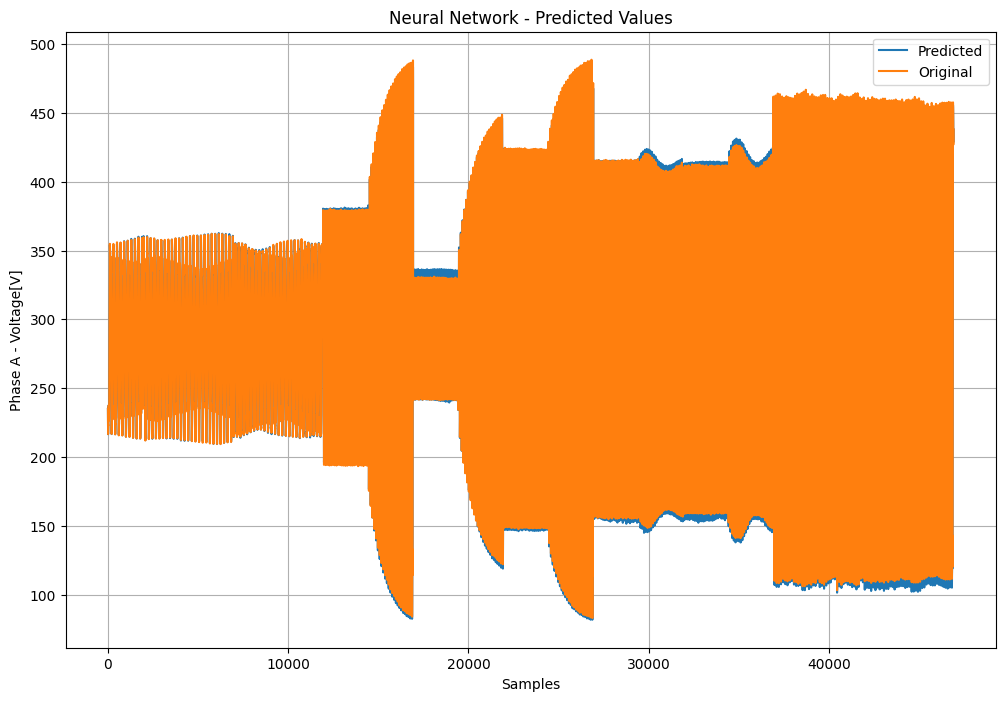

In [31]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
a=np.arange(start=0, stop=len(y_pred_test), step=1)
plt.plot(a,y_pred_test,label='Predicted')
plt.plot(a,y_test,label='Original')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('Phase A - Voltage[V]')
plt.legend()
plt.title('Neural Network - Predicted Values')

The test mean absolute error is 0.64V that is the lowest found during the whole analysis. Therefore we decided to proceed with the project making a sensitivity analysis with this method applying PCA in order to see the effects of a reduced dataset.

PCA - Principal Component Analysis

The principal component analysis is a linear algebra technique that allows to create a subset of the original dataset without losing most of the information. This method is very useful when we are dealing with large dataset that contains redundant variables since it creates a smaller and more usable dataset. The drawback of this method is that we lose the meaning of the variables.

In order to perform the PCA we have to standardize our datset, then we have to compute the covariance matrix. Computing the eigenvectors of this matrix and sorting them from the highest eigenvalue. The corresponding eigenvectors will be our components. Then we can project our original dataset on each subset of components in order to evaluate the quality of our projection on each subset: the more the components the more similar the subset will be to the original one. However we can see that a smaller number of components can lead to a dataset that has an explained variance very similar to the original one.

In our case we have 23 components (since we have 23 input variables) and it is sufficent to select the first 6 components in order to have 98% of the explained variance.

[ 35.62692513  70.68747478  89.02684377  92.38335185  95.38869974
  98.12545952  99.9010024   99.93294845  99.95170432  99.96814658
  99.97930426  99.98697899  99.99292068  99.99532624  99.99762254
  99.99850041  99.99899775  99.99945881  99.99967267  99.99978655
  99.99987352  99.99995435 100.        ]


Text(0, 0.5, 'Explained Variance % ')

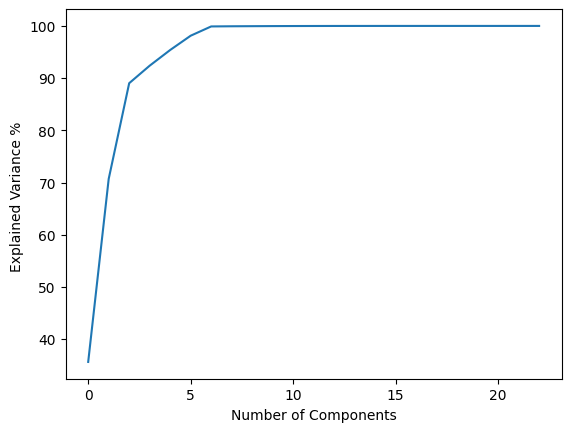

In [106]:
pca23 = PCA(n_components=23)
pca23.fit(dfx1)
print(np.cumsum(pca23.explained_variance_ratio_)*100)
plt.plot(np.cumsum(pca23.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance % ')

In [107]:
pca6 = PCA(n_components=6)
pca6.fit(dfx1)
dfx1_pca6=pca6.transform(dfx1)

The first attempt was done considering the same neural network configuration that gave the best results with the full dataset. Quality of results is clearly worsened since neural network architecture is strictly dependent on the input data. For this reason the neural network layout has been changed. However after several attempts the mean squared error was not decreasing below 350, thus we decided to use 10 components of the PCA.



In [108]:
pca10 = PCA(n_components=10)
pca10.fit(dfx1)
dfx1_pca10=pca10.transform(dfx1)

In [111]:
dfx1_pca10 = pd.DataFrame(dfx1_pca10)
k = 5
kf = KFold(n_splits=k, random_state=None)


ann_avg_mse_train=[]
ann_avg_rmse_train=[]
ann_avg_r2_train=[]
ann_avg_mape_train=[]

ann_avg_mse_test=[]
ann_avg_rmse_test=[]
ann_avg_r2_test=[]
ann_avg_mape_test=[]

mse_score_train = []
rmse_score_train = []
r2_score_train = []
mape_score_train = []

mse_score_test = []
rmse_score_test = []
r2_score_test = []
mape_score_test = []
 
for train_index , test_index in kf.split(dfx1_pca10):

    X_train , X_test = dfx1_pca10.iloc[train_index,:],dfx1_pca10.iloc[test_index,:]
    y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
     
    
    ANN = keras.Sequential([
        keras.layers.Flatten(input_shape=(10,)),  # input layer (1)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (1)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (1)
        keras.layers.Dense(50, activation='relu'),  # hidden layer (1)
        keras.layers.Dense(1, activation='linear') # output layer (7)
    ])


    ANN.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

    keras.callbacks.EarlyStopping(monitor='loss',
                                  min_delta=0.1,
                                  patience=3,
                                  verbose=1, mode='auto')

    mse_score_train = []
    rmse_score_train = []
    r2_score_train = []
    mape_score_train = []

    mse_score_test = []
    rmse_score_test = []
    r2_score_test = []
    mape_score_test = []
            
        
    ANN.fit(X_train,y_train,epochs=150,shuffle=False)

    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
     
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_score_train.append(mse_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_score_train.append(rmse_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_score_train.append(r2_train)
    mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mape_score_train.append(mape_train)

    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    mse_score_test.append(mse_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    rmse_score_test.append(rmse_test)
    r2_test = r2_score(y_test, y_pred_test)
    r2_score_test.append(r2_test)
    mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
    mape_score_test.append(mape_test)
     
ann_avg_mse_train.append(sum(mse_score_train)/k)
ann_avg_rmse_train.append(sum(rmse_score_train)/k)
ann_avg_r2_train.append(sum(r2_score_train)/k)
ann_avg_mape_train.append(sum(mape_score_train)/k)

ann_avg_mse_test.append(sum(mse_score_test)/k)
ann_avg_rmse_test.append(sum(rmse_score_test)/k)
ann_avg_r2_test.append(sum(r2_score_test)/k)
ann_avg_mape_test.append(sum(mape_score_test)/k)


Epoch 1/150


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3665/3665 ━━━━━━━━━━━━━━━━━━━━ 3s 544us/step - loss: 11632.3691
Epoch 2/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - loss: 408.8770
Epoch 3/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step - loss: 352.8134
Epoch 4/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step - loss: 352.6217
Epoch 5/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - loss: 344.1027
Epoch 6/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 515us/step - loss: 345.5948
Epoch 7/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 557us/step - loss: 330.0480
Epoch 8/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 520us/step - loss: 309.7558
Epoch 9/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 508us/step - loss: 293.8872
Epoch 10/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - loss: 300.8432
Epoch 11/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 562us/step - loss: 280.7371
Epoch 12/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step - loss: 283.0820
Epoch 13/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 516us/step - loss: 256.6945
Epoch 14/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3665/3665 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step - loss: 14715.8730
Epoch 2/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 553us/step - loss: 270.7317
Epoch 3/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 522us/step - loss: 115.4491
Epoch 4/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 549us/step - loss: 99.3841
Epoch 5/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 556us/step - loss: 83.8262
Epoch 6/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 555us/step - loss: 73.9800
Epoch 7/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 536us/step - loss: 69.7651
Epoch 8/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step - loss: 64.2246
Epoch 9/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - loss: 60.1687
Epoch 10/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 539us/step - loss: 57.1443
Epoch 11/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 536us/step - loss: 54.4330
Epoch 12/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 538us/step - loss: 52.8711
Epoch 13/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - loss: 51.5266
Epoch 14/150
3665/3665 ━━━━━━━━━━━━━━━━━━━━ 2s 541us/s

In [112]:
print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ann_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ann_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ann_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ann_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ann_avg_mape_test),2))

TRAINING
Mean Squared Error: [16.4]
Root Mean Squared Error: [2.86]
R Squared Score is: [0.499]
Mean absolute error is: [2.43]
TEST
Mean Squared Error: [410.3]
Root Mean Squared Error: [14.32]
R Squared Score is: [0.429]
Mean absolute error is: [11.62]


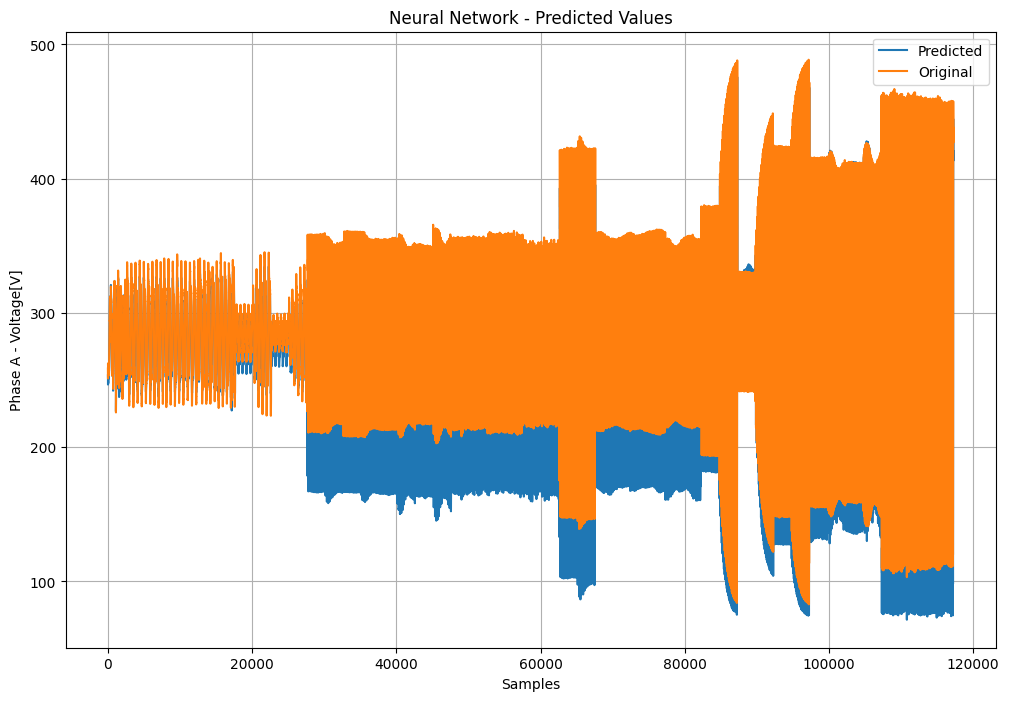

In [113]:
stfig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
a=np.arange(start=0, stop=len(y_pred_test), step=1)
plt.plot(a,y_pred_test,label='Predicted')
plt.plot(a,y_test,label='Original')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('Phase A - Voltage[V]')
plt.legend()
plt.title('Neural Network - Predicted Values');

The results are better with respect to the 6 component case and to the full data-set case. The reason why the model works better with 10 compontents than with the full dataset case is probably a non-optimal research of hyperparameters. A reason why could be also that some variables are highly correlated, generating noise in the predictor. The model is fully in line with our expecations (mean absolute error < 2V) and, thanks to PCA, has a reduced number of input variables.

Support Vector Machine

In [ ]:
k = 5

svm_avg_mse_train=[]
svm_avg_rmse_train=[]
svm_avg_r2_train=[]
svm_avg_mape_train=[]
svm_avg_mse_test=[]
svm_avg_rmse_test=[]
svm_avg_r2_test=[]
svm_avg_mape_test=[]


kf = KFold(n_splits=k, random_state=None)
svm = SVR()
mse_score_train = []
rmse_score_train = []
r2_score_train = []
mape_score_train = []
mse_score_test = []
rmse_score_test = []
r2_score_test = []
mape_score_test = []
for train_index , test_index in kf.split(dfx1):
    X_train , X_test = dfx1.iloc[train_index,:],dfx1.iloc[test_index,:]
    y_train , y_test = dfy1.iloc[train_index] , dfy1.iloc[test_index]
    print(train_index)
    
    svm.fit(X_train,y_train)
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)
    
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_score_train.append(mse_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_score_train.append(rmse_train)
    r2_train = r2_score(y_train, y_pred_train)
    r2_score_train.append(r2_train)
    mape_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mape_score_train.append(mape_train)
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    mse_score_test.append(mse_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    rmse_score_test.append(rmse_test)
    r2_test = r2_score(y_test, y_pred_test)
    r2_score_test.append(r2_test)
    mape_test = metrics.mean_absolute_error(y_test, y_pred_test)
    mape_score_test.append(mape_test)
    
svm_avg_mse_train.append(sum(mse_score_train)/k)
svm_avg_rmse_train.append(sum(rmse_score_train)/k)
svm_avg_r2_train.append(sum(r2_score_train)/k)
svm_avg_mape_train.append(sum(mape_score_train)/k)
svm_avg_mse_test.append(sum(mse_score_test)/k)
svm_avg_rmse_test.append(sum(rmse_score_test)/k)
svm_avg_r2_test.append(sum(r2_score_test)/k)
svm_avg_mape_test.append(sum(mape_score_test)/k)

[ 46906  46907  46908 ... 234524 234525 234526]


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("TRAINING")
print("Mean Squared Error:",np.around(np.array(svm_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(svm_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(svm_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(svm_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(svm_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(svm_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(svm_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(svm_avg_mape_test),2))

In [6]:
X_train , X_test , y_train , y_test = train_test_split(dfx1, dfy1, test_size=0.25, shuffle=False)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(dfx1, dfy1, test_size=0.25, shuffle=False)

svm = SVR(kernel="linear")
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
y_pred_test = svm.predict(X_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  

print("RMSE Training:",rmse_train)
print("RMSE Test:",rmse_test)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Flatten the target vectors to avoid the warning
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Fit the model
svm = SVR()
svm.fit(X_train, y_train)

# Make predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

# Print the results
print("RMSE Training:", rmse_train)
print("RMSE Test:", rmse_test)


# Ensembling

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras import models, layers
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics

# Initialize lists for metrics storage
ens_avg_mse_train = []
ens_avg_rmse_train = []
ens_avg_r2_train = []
ens_avg_mape_train = []
ens_avg_mse_test = []
ens_avg_rmse_test = []
ens_avg_r2_test = []
ens_avg_mape_test = []

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, random_state=None)

# Initialize model instances (assuming models are already fitted)
ANN = models.Sequential([
    layers.Flatten(input_shape=(10,)),  # input layer
    layers.Dense(50, activation='relu'),  # hidden layer
    layers.Dense(50, activation='relu'),  # hidden layer
    layers.Dense(50, activation='relu'),  # hidden layer
    layers.Dense(1, activation='linear')  # output layer
])

ANN.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

# Initialize Decision Tree Regressor and Random Forest Regressor
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)


# Start k-fold cross-validation
for train_index, test_index in kf.split(dfx1_pca10):
    X_train, X_test = dfx1_pca10.iloc[train_index, :], dfx1_pca10.iloc[test_index, :]
    y_train, y_test = dfy1.iloc[train_index], dfy1.iloc[test_index]

    # Fit the ANN model
    ANN.fit(X_train, y_train, epochs=150, shuffle=False, verbose=0)

    # Predictions for ANN
    y_pred_train_ann = ANN.predict(X_train)
    y_pred_test_ann = ANN.predict(X_test)

    # Train the Decision Tree and Random Forest
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Predictions for Decision Tree and Random Forest
    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    y_pred_train_rf = rf.predict(X_train)
    y_pred_test_rf = rf.predict(X_test)

    # Create a Voting Regressor with the trained models
    voting_regressor = VotingRegressor(estimators=[('ANN', ANN), ('DT', dt), ('RF', rf)])
    voting_regressor.fit(X_train, y_train)

    # Predictions with Voting Regressor
    y_pred_train_vr = voting_regressor.predict(X_train)
    y_pred_test_vr = voting_regressor.predict(X_test)

    # Calculate metrics for training set
    mse_train = mean_squared_error(y_train, y_pred_train_vr)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train_vr)
    mape_train = mean_absolute_error(y_train, y_pred_train_vr)

    # Calculate metrics for testing set
    mse_test = mean_squared_error(y_test, y_pred_test_vr)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test_vr)
    mape_test = mean_absolute_error(y_test, y_pred_test_vr)

    # Append the metrics for each fold
    ens_avg_mse_train.append(mse_train)
    ens_avg_rmse_train.append(rmse_train)
    ens_avg_r2_train.append(r2_train)
    ens_avg_mape_train.append(mape_train)
    ens_avg_mse_test.append(mse_test)
    ens_avg_rmse_test.append(rmse_test)
    ens_avg_r2_test.append(r2_test)
    ens_avg_mape_test.append(mape_test)



In [ ]:
print("TRAINING")
print("Mean Squared Error:",np.around(np.array(ens_avg_mse_train),1))
print("Root Mean Squared Error:",np.around(np.array(ens_avg_rmse_train),2))
print("R Squared Score is:", np.around(np.array(ens_avg_r2_train),3))
print("Mean absolute error is:", np.around(np.array(ens_avg_mape_train),2))

print("TEST")
print("Mean Squared Error:", np.around(np.array(ens_avg_mse_test),1))
print("Root Mean Squared Error:",np.around(np.array(ens_avg_rmse_test),2))
print("R Squared Score is:", np.around(np.array(ens_avg_r2_test),3))
print("Mean absolute error is:", np.around(np.array(ens_avg_mape_test),2))

In [ ]:
# After the k-fold loop, compute the average performance over all folds
print("Average performance across all folds:")
print(f"Train MSE: {np.mean(ann_avg_mse_train):.4f}")
print(f"Train RMSE: {np.mean(ann_avg_rmse_train):.4f}")
print(f"Train R2: {np.mean(ann_avg_r2_train):.4f}")
print(f"Train MAPE: {np.mean(ann_avg_mape_train):.4f}")

print(f"Test MSE: {np.mean(ann_avg_mse_test):.4f}")
print(f"Test RMSE: {np.mean(ann_avg_rmse_test):.4f}")
print(f"Test R2: {np.mean(ann_avg_r2_test):.4f}")
print(f"Test MAPE: {np.mean(ann_avg_mape_test):.4f}")
